<a href="https://colab.research.google.com/github/perfectporfoliopablo/Curso-Lenguaje-Orientado-a-objetos-y-bases-de-datos/blob/main/TUTORIAL_SKLEARN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***SHALLOW LEARNING***#

HAY DOS GRANDES GRUPOS; SUPERVISED O UNSUPERVISED.

##1.- **SUPERVISED LEARNING.**
NECESITAN DATOS ETIQUETADOS. SI POR EJEMPLO ESTAMOS CLASIFICANDO IMAGENES
NECESITAMOS EJEMPLOS DE LAS IMAGENES Y LA CLASE QUE TENEMOS QUE DARLE A CADA
IMAGEN, ESTO LLEVA TIEMPO, ES DIFICIL, NECESITAS GENTE QUE HAGA ESO

###1.1 REGRESION.
####VARIOS PROYECTOS

###1.2 CLASIFICACION.
####VARIOS PROYECTOS

##2.- **UNSUPERVISED LEARNING.**
NO NECESITA DATOS ETIQUETADOS, SOLO CON DATOS NO ETIQUETADOS DE FORMA NO SUPERVISADA, ALGO APRENDEN TAMBIEN LOS ALGORITMOS.

###2.1 CLUSTERING. AGRUPAR DATOS EN DIFERENTES GRUPOS QUE PUEDAN SERVIR PARA RESOLVER UNA TAREA
####VARIOS PROYECTOS

La regresión se utiliza para predecir un valor continuo en función de uno o más
valores de entrada. Un ejemplo de esto sería predecir el precio de una casa basado en características como su ubicación, el número de habitaciones, el tamaño del lote, etc. Los algoritmos de regresión intentan trazar una línea (o una superficie, en el caso de múltiples variables de entrada) que modela la relación entre las entradas y la salida. Los modelos de regresión más comunes incluyen la regresión lineal.

# 1.- MODELO REGRESION LINEAL UNA VARIABLE

In [ ]:
# Importamos las librerías

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget -O country_stats.csv https://raw.githubusercontent.com/CharlieScot/Inteligencia-Artificial/main/MODULO_4/country_stats.csv

--2024-04-28 17:27:20--  https://raw.githubusercontent.com/CharlieScot/Inteligencia-Artificial/main/MODULO_4/country_stats.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 715 [text/plain]
Saving to: ‘country_stats.csv’

country_stats.csv   100%[===================>]     715  --.-KB/s    in 0s      

2024-04-28 17:27:20 (59.4 MB/s) - ‘country_stats.csv’ saved [715/715]



In [ ]:
# Creamos Dataframe com Pandas leyendo el archivo csv

df=pd.read_csv('country_stats.csv')

df

,Pais,PIB per capita,Indice de felicidad
0,Russia,9054.914,6.0
1,Turkey,9437.372,5.6
2,Hungary,12239.893,4.9
3,Poland,12495.333,5.8
4,Slovak Republic,15991.736,6.1
5,Estonia,17288.083,5.6
6,Greece,18064.288,4.8
7,Portugal,19121.592,5.1
8,Slovenia,20732.482,5.7
9,Spain,25864.721,6.5


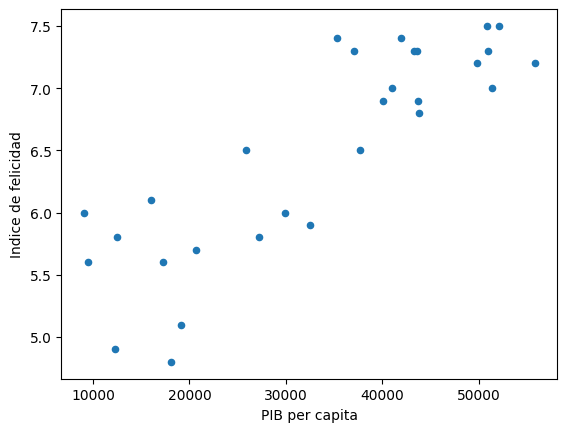

In [ ]:
# Visualización de la data usando la librería Matplotlib

df.plot(kind= 'scatter', x='PIB per capita', y='Indice de felicidad')

plt.show()

In [ ]:
# Parece que se ve una tendencia que indica que cuanto mayor es el PIB de un pais
# mas satisfecha esta la gente
# Vamos a desarrollar un modelo que en base a estos datos nos permita saber para
# cualquier pais su nivel de satisfaccion, es una tarea de regresion
# Usaremos un algoritmo muy simple que se basa en una regresion lineal, es
# una recta

# y= m*x + b

# y    variable que queremos predecir
# m    pendiente de la recta
# x    PIB
# b    valor del eje Y donde la recta corta ese eje

# Tenemos que entrenar a este modelo para darle unos valores a los parametros
# que son la m y la b, que se ajusten a la tendencia que vemos en la grafica

# Usamos la libreria de Scikit Learn

La ecuación general de una regresión lineal simple es:

$y = mx + b$

donde:

+   $y$ es la variable dependiente,
+   $x$ es la variable independiente,
+   $m$ es la pendiente de la línea (coeficiente de la variable independiente),
+   $b$ es el intercepto.

En términos prácticos, el intercepto indica el valor de $y$ cuando $x$ es igual a cero.

El intercepto en una regresión lineal es el valor en el eje vertical (eje y) donde la línea de regresión cruza o intercepta dicho eje.

In [ ]:
# Creación del modelo de Regresion Lineal usando la librería Sklearn y numpy

from sklearn.linear_model import LinearRegression
import numpy as np

#Creamos una instancia de un modelo de regresion lineal
#Instancia el objeto
model = LinearRegression()

# A continuación, np.c_ se utiliza para concatenar las columnas del DataFrame
# df["GDP per capita"] y df["Life satisfaction"] a lo largo del segundo eje.
# Esto es necesario porque lin1.fit espera que Xsample y ysample sean arreglos
# bidimensionales, y np.c_ se utiliza para realizar esta concatenación de
# manera conveniente.
#si tienes dos arrays de una dimensión, np.c_ los unirá para formar un array de
# dos dimensiones, colocando cada array como una columna, mientras que
# np.concatenate los unirá en la forma que especifiques usando el argumento
# del eje.

#Xsample = np.c_[df["PIB per capita"]]
#ysample = np.c_[df["Indice de felicidad"]]
X= df[['PIB per capita']]
y= df[['Indice de felicidad']]
model.fit(X, y)

# Se obtienen los coeficientes de la ecuación de regresión lineal. b representa
# la ordenada al origen (intercepto), y m representa la pendiente de la línea.

#Creamos variables paralelas
b, m= model.intercept_[0], model.coef_[0][0]

# Aquí, intercept_ es un array unidimensional. Aunque este array generalmente
# contiene solo un elemento (especialmente en la regresión lineal simple), aún se
# almacena como un array.
# El uso de [0] es para acceder al primer elemento de este array unidimensional.

# Se usa [0][0] porque coef_ es un arreglo bidimensional: el primer [0] selecciona
# el grupo de coeficientes para la respuesta (aunque sólo haya una), y el
# segundo [0] selecciona el coeficiente específico de la primera variable.

b, m

# Esto significa que el modelo predice el Índice de felicidad en función del PIB
# per cápita con estas constantes resultantes. El intercepto representa el valor
# estimado del Índice de felicidad cuando el PIB per cápita es cero, y el
# coeficiente indica el cambio en el Índice de felicidad por cada unidad de
# aumento en el PIB per cápita.

(4.8530528073310295, 4.911544598433898e-05)

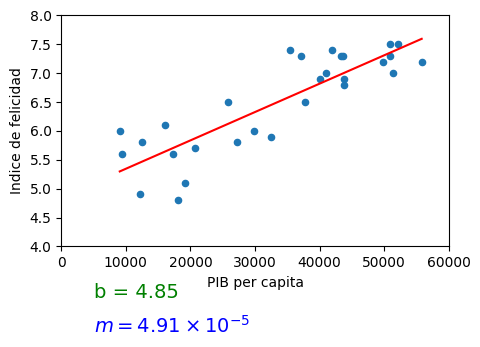

In [ ]:
df.plot(kind='scatter', x="PIB per capita", y='Indice de felicidad', figsize=(5,3))
plt.axis([0, 60000, 4, 8])

plt.plot(X, m*X + b, "r")
plt.text(5000, 3.1, "b = 4.85", fontsize=14, color="g")
plt.text(5000, 2.5, r"$m = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

In [ ]:
#vamos a usar nuestro algoritmo para predecir el nivel de satisfaccion de
#cualquier pais del que sepamos su PIB

chipre_gdp_per_capita = 22587
chipre_predecir_indice_felicidad = model.predict([[chipre_gdp_per_capita]])
chipre_predecir_indice_felicidad

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[5.96242339]])

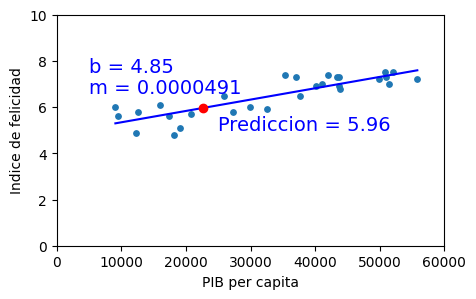

In [ ]:
df.plot(kind='scatter', x="PIB per capita", y='Indice de felicidad', figsize=(5,3), s=15)

plt.plot(X, m*X + b, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, "b = 4.85", fontsize=14, color="b")
plt.text(5000, 6.6, "m = 0.0000491", fontsize=14, color="b")

plt.plot(chipre_gdp_per_capita, chipre_predecir_indice_felicidad, 'ro')
plt.text(25000, 5.0, "Prediccion = 5.96", fontsize=14, color="b")

plt.show()

# [cyprus_pib_per_capita, cyprus_pib_per_capita]: Esta lista define las coordenadas
# x de dos puntos en el gráfico. Curiosamente, ambos puntos tienen el mismo valor
# cyprus_pib_per_capita, lo que significa que en términos de coordenadas x, ambos
# puntos están en la misma posición. Esto sugiere que cyprus_pib_per_capita es un
# valor numérico, posiblemente el PIB per cápita de Chipre.

# [0, cyprus_predicted_indice_felicidad]: Esta lista define las coordenadas y de l
# os dos puntos. El primer punto está en 0 y el segundo en cyprus_predicted_indice_felicidad.
# Esto indica que se está trazando una línea vertical desde 0 hasta
# cyprus_predicted_indice_felicidad en el eje y, en la posición x definida por
# cyprus_pib_per_capita.

# 2.- MODELO REGRESION LINEAL MULTIVARIABLE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Advertising.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'Advertising.csv'

In [ ]:
df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar la columna innecesaria
#df.drop(columns=['Unnamed: 0'], inplace=True)

# Definir las variables independientes (X) y la variable dependiente (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

#Obtener los coeficientes y el intercepto

#Un aumento de 1 unidad en la inversión en publicidad en TV se asocia con un
# aumento aproximado de 0.0447 unidades en las ventas.
# Un aumento de 1 unidad en la inversión en publicidad en radio se asocia con un
# aumento aproximado de 0.1891 unidades en las ventas.
# Un aumento de 1 unidad en la inversión en publicidad en periódicos se asocia con
# un aumento de de 0.0027 unidades en las ventas, aunque este coeficiente es muy
# cercano a cero, lo que indica que podría tener poco o ningún efecto.
# El intercepto de 2.979 sugiere el nivel base de ventas cuando la inversión en
# todas las formas de publicidad es cero.

coefficients = model.coef_
intercept = model.intercept_

coefficients, intercept

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Nuevos valores para predicción
new_data = [[5.2, 50.5, 80.5]]

# Realizar la predicción con el modelo entrenado
# Dado que predicted_sales es un arreglo que contiene las predicciones del modelo,
# predicted_sales[0] simplemente accede al primer elemento de este arreglo, que es
# la predicción para la primera y única observación(1 sola fila de datos: 5.2,
# 50.5 y 80.5)
# en new_data.

predicted_sales = model.predict(new_data)
predicted_sales[0]


In [ ]:
# Calcular métricas para evaluar el desempeño del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

In [ ]:
# Aquí tienes un resumen estadístico de la columna 'Sales' de los datos:

# Cantidad de datos (count): 200 observaciones.
# Media (mean): 14.02 unidades de venta.
# Desviación estándar (std): 5.22, lo que indica la variabilidad de las ventas.
# Mínimo (min): 1.6 unidades de venta.
# Máximo (max): 27.0 unidades de venta.
# Cuartiles:
# 25%: 10.38 unidades de venta.
# 50% (mediana): 12.9 unidades de venta.
# 75%: 17.4 unidades de venta.

In [ ]:
# Mean Squared Error (MSE) de 3.174:
# Dado que la desviación estándar de las ventas es aproximadamente 5.22, un MSE
# de 3.174 significa que el error cuadrático medio del modelo es menor que la
# desviación estándar. Esto indica que las predicciones del modelo tienen un error
#  promedio bastante bajo en comparación con la variabilidad natural de las ventas.
# R² de 0.899:(varia entre 0 y 1)
# Un R² de 0.899 es muy alto, indicando que el modelo puede explicar
# aproximadamente el 89.9% de la variación en las ventas a partir de los gastos
# en publicidad en TV, radio y periódicos. Esto confirma que el modelo es efectivo
# en capturar la relación entre las inversiones en publicidad y las ventas
# generadas.
# Conclusión:
# El modelo de regresión tiene un buen desempeño general. El bajo MSE en relación
# a la desviación estándar y el alto R² sugieren que el modelo predice las ventas
# de manera efectiva y con precisión razonable, considerando la variabilidad de
# las ventas observadas. Esto implica que el modelo es una herramienta útil para
# predecir las ventas basadas en la inversión publicitaria. ​

In [ ]:
import matplotlib.pyplot as plt

# Configurar la gráfica
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['TV'], df['Sales'], s=df['Newspaper']*15, c=df['Radio'], cmap='viridis_r', alpha=0.6)

# Añadir etiquetas y título
plt.xlabel('Gasto en Publicidad en TV')
plt.ylabel('Ventas')
plt.title('Gráfica de Burbujas de Gastos en Publicidad')

# Añadir una barra de color para interpretar el gasto en Radio
plt.colorbar(scatter, label='Gasto en Publicidad en Radio')

# Mostrar la grilla
plt.grid()

# Mostrar la gráfica
plt.show()

# 3.- MODELO REGRESION POLINOMIAL

In [ ]:
# Ecuación: La forma básica de un modelo de regresión polinomial sería:

# y=𝛽0 + 𝛽1𝑥 + 𝛽2x² …...+𝛽𝑛𝑥^𝑛 + 𝜖

# Aquí, x es la variable independiente elevada a diferentes potencias (hasta
# n), y cada término tiene su propio coeficiente que describe la contribución de
# esa potencia de x a la variable dependiente y.

# Uso: Es especialmente útil en casos donde los datos muestran patrones no
# lineales. Al incrementar el grado del polinomio, el modelo puede capturar
# relaciones más complejas, pero a costa de un mayor riesgo de sobreajuste.

import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Paso 1: Cargar el conjunto de datos
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# Paso 2: Preparar los datos
# Seleccionamos algunas características para simplificar el modelo
X = df[['MedInc', 'HouseAge', 'AveRooms']]  # Ingreso medio, edad de la casa, promedio de cuartos
y = df['MedHouseVal']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Crear características polinomiales
# Este código se utiliza típicamente en el contexto del aprendizaje automático para
# transformar un conjunto de datos con características lineales a un formato que
# pueda modelar relaciones no lineales.
# Este código prepara los datos tanto de entrenamiento como de prueba para un
# modelo de aprendizaje automático que intentará capturar tanto las relaciones
# lineales como las no lineales entre las características. Esto es particularmente
# útil para modelos que suponen que la relación entre las características y la
# variable objetivo puede ser más compleja que una simple relación lineal.
# Te permite construir un modelo que puede capturar mucho mejor la complejidad
# de los datos, haciéndolo más flexible y capaz de capturar patrones no lineales
# que de otro modo podrían pasarse por alto. Degree es la potencia maxima de las
# variables en este caso X². Include_bias=False Evita que se añada una
# característica de sesgo (una columna de unos).que normalmente se usa para
# modelar el término independiente en un modelo lineal.
# el método fit_transform primero "aprende" qué características necesita crear
#a partir del conjunto de entrenamiento (X_train), y luego transforma X_train en
#este nuevo conjunto de características polinomiales. Esto prepara X_train_poly,
#que ahora contiene tanto las características originales como las derivadas
#polinomialmente.
# Usando el método transform, transformamos el conjunto de prueba (X_test) en el
# mismo conjunto de características polinomiales que el de entrenamiento.
# Importante: sólo se utiliza transform y no fit_transform, porque queremos
# utilizar las mismas transformaciones y ajustes que aprendimos con el conjunto de
# entrenamiento.
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Paso 4: Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Paso 5: Evaluar el modelo
y_pred = model.predict(X_test_poly)
import numpy as np

# Supongamos que tienes nuevos datos que se ajustan a las mismas características:
nuevos_datos = np.array([[3.5, 15, 5], [2.0, 30, 3]])  # [Ingreso medio,
#Edad de la casa, Promedio de cuartos]

# Transformamos los nuevos datos al mismo formato polinomial usado en el entrenamiento
nuevos_datos_poly = poly_features.transform(nuevos_datos)

# Realizamos la predicción utilizando el modelo entrenado
predicciones = model.predict(nuevos_datos_poly)

# Imprimimos las predicciones
print("Predicciones:", predicciones)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Predicciones: [1.74758002 1.38695135]
Mean Squared Error: 0.6420081797325325
R^2 Score: 0.5100703746746547


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
#Agregamos una cuarta variable para ver si mejoran las metricas

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Cargar el conjunto de datos de viviendas de California
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['MedHouseVal'] = california_housing.target

# Seleccionar características
X = data[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']]  # Asumiendo que 'AveOccup' es correcto
y = data['MedHouseVal']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear características polinomiales
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.6243838746050159
R^2 Score: 0.523519843825252


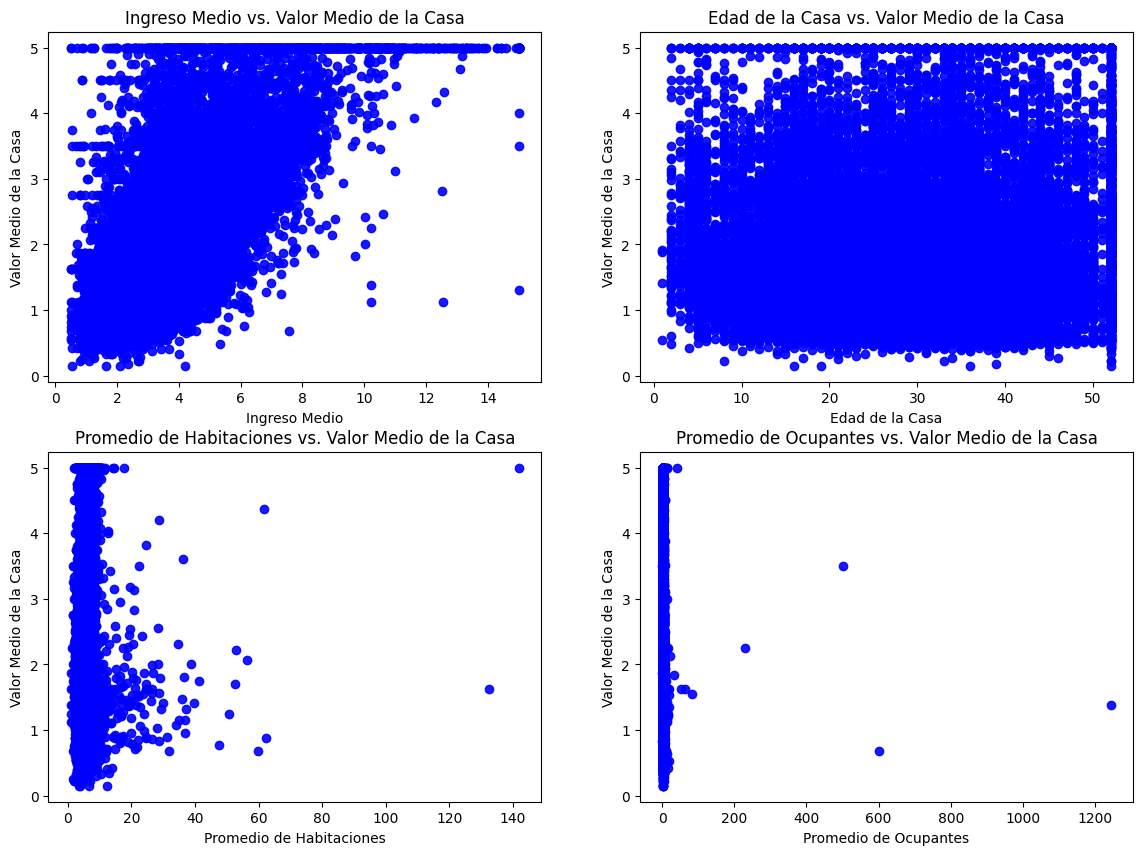

In [ ]:
import matplotlib.pyplot as plt

# Datos de ejemplo, asegúrate de que estos datos estén correctamente definidos en tu contexto
X_train = data[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']]  # Variables independientes
y_train = data['MedHouseVal']  # Variable dependiente

# Configuración de la figura principal
plt.figure(figsize=(14, 10))


# Gráfico de dispersión para Ingreso Medio vs. Valor Medio de la Casa
plt.subplot(2, 2, 1)  # 2 filas, 2 columnas, posición 1
plt.scatter(X_train['MedInc'], y_train, alpha=0.9, color='blue')
plt.title('Ingreso Medio vs. Valor Medio de la Casa')
plt.xlabel('Ingreso Medio')
plt.ylabel('Valor Medio de la Casa')

# Gráfico de dispersión para Edad de la Casa vs. Valor Medio de la Casa
plt.subplot(2, 2, 2)  # 2 filas, 2 columnas, posición 2
plt.scatter(X_train['HouseAge'], y_train, alpha=0.9, color='blue')
plt.title('Edad de la Casa vs. Valor Medio de la Casa')
plt.xlabel('Edad de la Casa')
plt.ylabel('Valor Medio de la Casa')

# Gráfico de dispersión para Promedio de Habitaciones vs. Valor Medio de la Casa
plt.subplot(2, 2, 3)  # 2 filas, 2 columnas, posición 3
plt.scatter(X_train['AveRooms'], y_train, alpha=0.9, color='blue')
plt.title('Promedio de Habitaciones vs. Valor Medio de la Casa')
plt.xlabel('Promedio de Habitaciones')
plt.ylabel('Valor Medio de la Casa')

# Gráfico de dispersión para Promedio de Ocupantes vs. Valor Medio de la Casa
plt.subplot(2, 2, 4)  # 2 filas, 2 columnas, posición 4
plt.scatter(X_train['AveOccup'], y_train, alpha=0.9, color='blue')
plt.title('Promedio de Ocupantes vs. Valor Medio de la Casa')
plt.xlabel('Promedio de Ocupantes')
plt.ylabel('Valor Medio de la Casa')


plt.show()

#4.- MODELO DE CLASIFICACION. REGRESION LOGISTICA

La clasificación es un tipo de problema en el que el objetivo es predecir una
categoría o clase a partir de uno o más valores de entrada. Un ejemplo común es el filtro de spam de un proveedor de correo electrónico, que clasifica los correos electrónicos como "spam" o "no spam" basándose en una serie de características del correo electrónico. Algunos de los algoritmos más comunes para los problemas de clasificación incluyen la regresion logistica,  las máquinas de vectores de soporte (SVM), los árboles de decisión y las redes neuronales.

In [ ]:
# La regresión logística en scikit-learn se considera un modelo de clasificación.
# Aunque el término "regresión" está presente en su nombre, la regresión logística
# se utiliza principalmente para problemas de clasificación binaria o multiclase.

# La regresión logística estima la probabilidad de que una instancia pertenezca a
# una clase específica utilizando una función logística o sigmoide.
# A partir de esta probabilidad estimada, se toma una decisión de clasificación
# asignando la instancia a la clase con la probabilidad más alta.

# En el caso del dataset Iris en scikit-learn, la regresión logística se puede
# utilizar para clasificar las flores en diferentes especies utilizando las
# características disponibles en el conjunto de datos.



In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


#cargamos el dataset Iris
iris = load_iris()
X = iris.data    #las 4 caracteristicas
y = iris.target   #las 3 etiquetas diferentes

# El dataset Iris contiene mediciones de características de tres especies de
# flores: setosa, versicolor y virginica. Cada muestra del dataset tiene cuatro
# características: longitud y ancho del sépalo, y longitud y ancho del pétalo.




In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

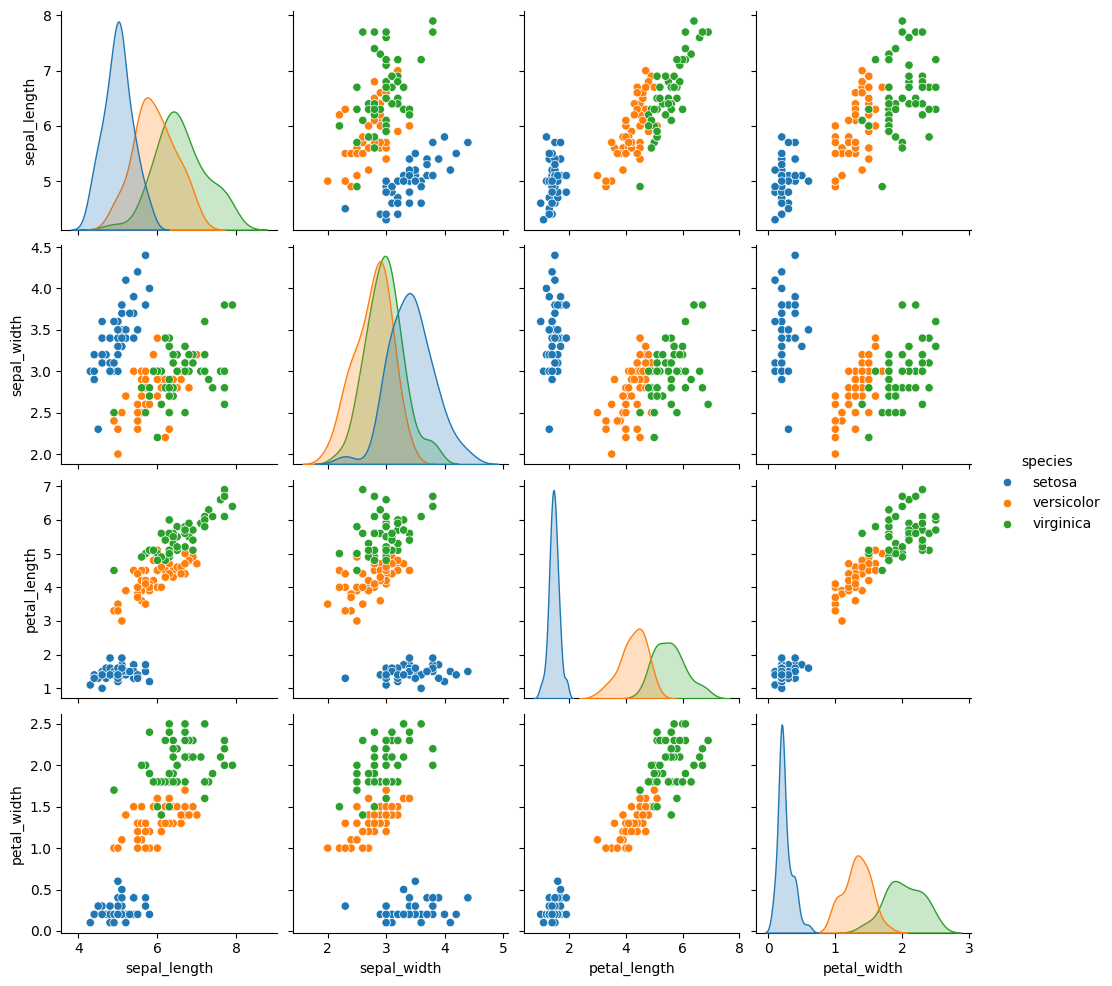

In [ ]:
#Matriz de dispersion
# Una matriz de dispersión de las características del conjunto de datos Iris
# puede ayudarte a entender las relaciones entre las diferentes características
# (longitud del sépalo, ancho del sépalo, longitud del pétalo, ancho del pétalo)
# y cómo estas se distribuyen según las clases (tipos de flores:setosa, virginica
# y versicolor). Esto es útil para ver cómo las características se agrupan por especie.
import seaborn as sns
import matplotlib.pyplot as plt
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species')
plt.show()

In [ ]:
# dividimos los datos en conjuntos de entrenamiento y prueba usando la funcion
#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Creamos una instancia del modelo de regresion logistica y lo entrenamos usando
#la funcion fit().
#Crear una instancia de un modelo algorítmico en el contexto del aprendizaje
#automático es similar a crear un objeto de una clase en Python.

model=LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#realizamos prediccion en el conjunto de prueba usando la funcion predict()

y_pred=model.predict(X_test)
#Nuevos datos de ejemplo
new_data = [[5.1, 3.5, 1.4, 0.2], [6.7, 3.0, 5.2, 2.3], [5.5, 2.4, 3.8, 1.1]]
new_predictions = model.predict(new_data)

print("Predicted classes for new data:", new_predictions)

Predicted classes for new data: [0 2 1]


La evaluación de un modelo de machine learning es un paso esencial para entender
cómo de bien está funcionando. Dependiendo de si tu modelo es de clasificación,
regresión o algún otro tipo de modelo, hay diferentes métricas que puedes usar.



*   ***Accuracy***: Es la proporción de predicciones correctas sobre
el total de predicciones. Es una métrica útil cuando las clases están
bien balanceadas. Buena maetrica para problemas multiclase
*   ***Recall (Sensitivity o True Positive Rate)***: Es la proporción de verdaderos
positivos que se identificaron correctamente. Es útil en situaciones
donde los falsos negativos son más preocupantes que los falsos
positivos. Mejor para problemas binarios
*   ***Precision***: Es la proporción de verdaderos positivos entre todas las
predicciones positivas. Es útil en situaciones donde los falsos
positivos son más preocupantes que los falsos negativos. Mejor para problemas binarios
*   ***F1 Score***: Es la media armónica de Precision y Recall. Intenta equilibrar
ambas métricas y es más útil que la precisión cuando tienes una
distribución de clases desequilibrada. Mejor para problemas binarios



Una matriz de confusión es una tabla que se utiliza para evaluar el rendimiento de un modelo de clasificación en problemas de aprendizaje supervisado. Es especialmente útil cuando se trata de problemas de clasificación binaria, aunque también se puede extender a problemas de clasificación multiclase.

La matriz de confusión muestra la cantidad de predicciones correctas e incorrectas realizadas por un modelo en cada clase. La estructura básica de la matriz de confusión es la siguiente:

**Verdaderos Positivos (TP) ⇒
Falsos Negativos (FN) ⇒
Falsos Positivos (FP) ⇒
Verdaderos Negativos (TN)**


*   ***Verdaderos Positivos (TP)***: Son las instancias que el modelo ha clasificado correctamente como positivas.
*   ***Falsos Negativos (FN)***: Son las instancias que el modelo ha clasificado incorrectamente como negativas cuando son positivas.
*   ***Falsos Positivos (FP)***: Son las instancias que el modelo ha clasificado incorrectamente como positivas cuando son negativas.
*   ***Verdaderos Negativos (TN)***: Son las instancias que el modelo ha clasificado correctamente como negativas.


In [ ]:
#evaluamos el rendimiento del modelo mediante alguna metrica como
#por ejemplo la precision (accuracy)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
# Creamos la matriz de confusión.

# Fila 1 (Clase 0):

# 10 se refiere a los casos en los que el modelo clasificó correctamente las
# instancias de la clase 0 como clase 0 (verdaderos positivos).
# 0 se refiere a los casos en los que el modelo clasificó incorrectamente las
# instancias de la clase 0 como alguna otra clase (falsos negativos).

# Fila 2 (Clase 1):

# 9 se refiere a los casos en los que el modelo clasificó correctamente las
# instancias de la clase 1 como clase 1 (verdaderos positivos).
# 0 se refiere a los casos en los que el modelo clasificó incorrectamente las
# instancias de la clase 1 como alguna otra clase (falsos negativos).

# Fila 3 (Clase 2):

# 11 se refiere a los casos en los que el modelo clasificó correctamente las
# instancias de la clase 2 como clase 2 (verdaderos positivos).
# 0 se refiere a los casos en los que el modelo clasificó incorrectamente las
# instancias de la clase 2 como alguna otra clase (falsos negativos).


matriz_confusion=confusion_matrix(y_test, y_pred)
print(matriz_confusion)

# Esta matriz de confusión sugiere que el modelo ha realizado clasificaciones
# perfectas para las tres clases, sin errores de clasificación, ya que todos los
# valores fuera de la diagonal principal son ceros. Esto es un resultado ideal en
# términos de clasificación.

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# 5.- MODELO DE CLASIFICACION. KNN



In [ ]:
#KNN, que significa k-nearest neighbors (k vecinos más cercanos), es un método
# de aprendizaje automático que se utiliza para clasificar datos o predecir
# resultados basándose en la similitud entre los ejemplos. Funciona asignando un
# nuevo punto de datos a la categoría más común entre sus k vecinos más cercanos
# en un espacio de características. KNN es simple y efectivo, especialmente en
# tareas donde las relaciones entre los datos son intrínsecamente no lineales.
# No requiere un modelo explícito, sino que toma decisiones basadas en la mayoría
# de votos de los vecinos más cercanos durante la fase de predicción.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Normalizar los datos
# KNN clasifica los puntos basándose en la distancia más cercana entre ellos. Si
# una característica tiene un rango mucho más amplio que otra, entonces tendrá un
# mayor impacto en la distancia, lo cual puede sesgar el modelo. La estandarización
# de las características para que tengan una media de 0 y una desviación estándar
# de 1 asegura que todas las características contribuyan equitativamente a la
# distancia.
# Algunas de las variables (columnas) tienen escalas muy diferentes
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Crear y entrenar el modelo KNN
# n_neighbors es un hiperparámetro que es un parametro cuyo valor se establece antes del
# entrenamiento del modelo y que influye en el comportamiento y el rendimiento del
# modelo. Los hiperparámetros no se derivan del proceso de entrenamiento, sino que
# se ajustan manualmente. Podemos probar con otros numeros no solo el 5
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Predecir los resultados para 4 conjuntos de prueba, la data tiene 30
# caracteristicas

# Cero es tumor maligno y 1 es tumor benigno
# new_data_escalada=[
#     [-0.5, 0.3, -0.4, -0.6, 0.7, -1.0, 0.3, -0.2, 0.5, -1.2,
#      1.0, -0.3, -0.5, -0.4, 0.9, -0.7, 0.5, -0.1, 0.2, -0.8,
#      -0.3, 0.4, -0.6, -0.5, 0.6, -0.9, 0.3, -0.4, 0.7, -1.1],
#     [-0.1, -1.0, 0.2, -0.3, -0.8, 0.5, -0.2, 0.1, -0.6, 0.3,
#      -0.2, 0.6, 0.1, 0.2, -0.5, 0.4, -0.6, 0.7, -0.1, 0.5,
#      0.2, -0.7, 0.3, -0.2, 0.4, -0.6, 0.2, 0.3, -0.7, 0.2],
#     [0.8, 0.2, 0.5, 0.6, 0.1, 0.3, 0.7, -0.5, 0.2, -0.1,
#      0.5, -0.4, 0.3, 0.7, -0.2, 0.1, -0.3, 0.6, -0.5, 0.4,
#      0.6, 0.3, 0.7, 0.5, -0.6, 0.2, 0.5, -0.4, 0.3, -0.2],
#     [0.2, -0.5, 0.1, 0.3, -0.7, 0.6, -0.1, 0.4, -0.3, 0.5,
#      -0.6, 0.2, 0.5, -0.4, 0.3, -0.2, 0.7, -0.1, 0.6, -0.5,
#      0.4, -0.6, 0.2, 0.1, -0.3, 0.7, -0.5, 0.3, -0.7, 0.6]
# ]
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:

# Asegúrate de que y_test tenga 4 etiquetas, aquí está un ejemplo si tu y_test es más grande:
#y_test_adjusted = y_test[:4]  # Ajusta según sea necesario

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9590643274853801

In [ ]:
# Crear una matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[ 59,   4],
       [  3, 105]])

Precisión del modelo: 0.9590643274853801


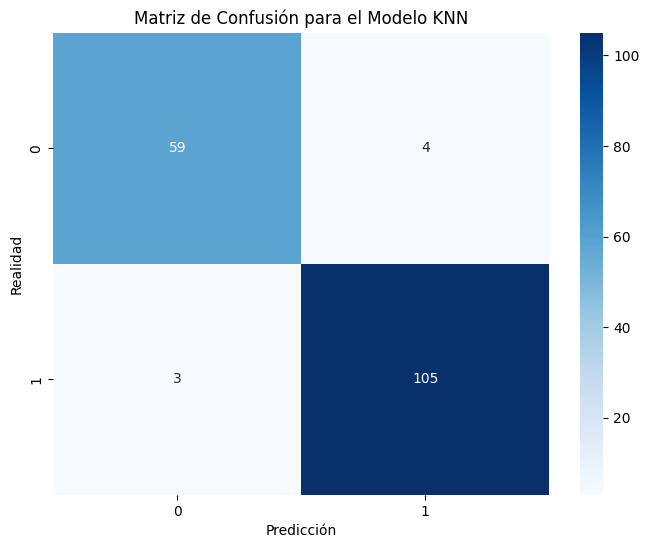

In [ ]:
#Mostrar la accuracy y la matriz de confusión
print("Precisión del modelo:", accuracy)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión para el Modelo KNN')
plt.show()

6.- MODELOS DE CLASIFICACION. DECISION TREE

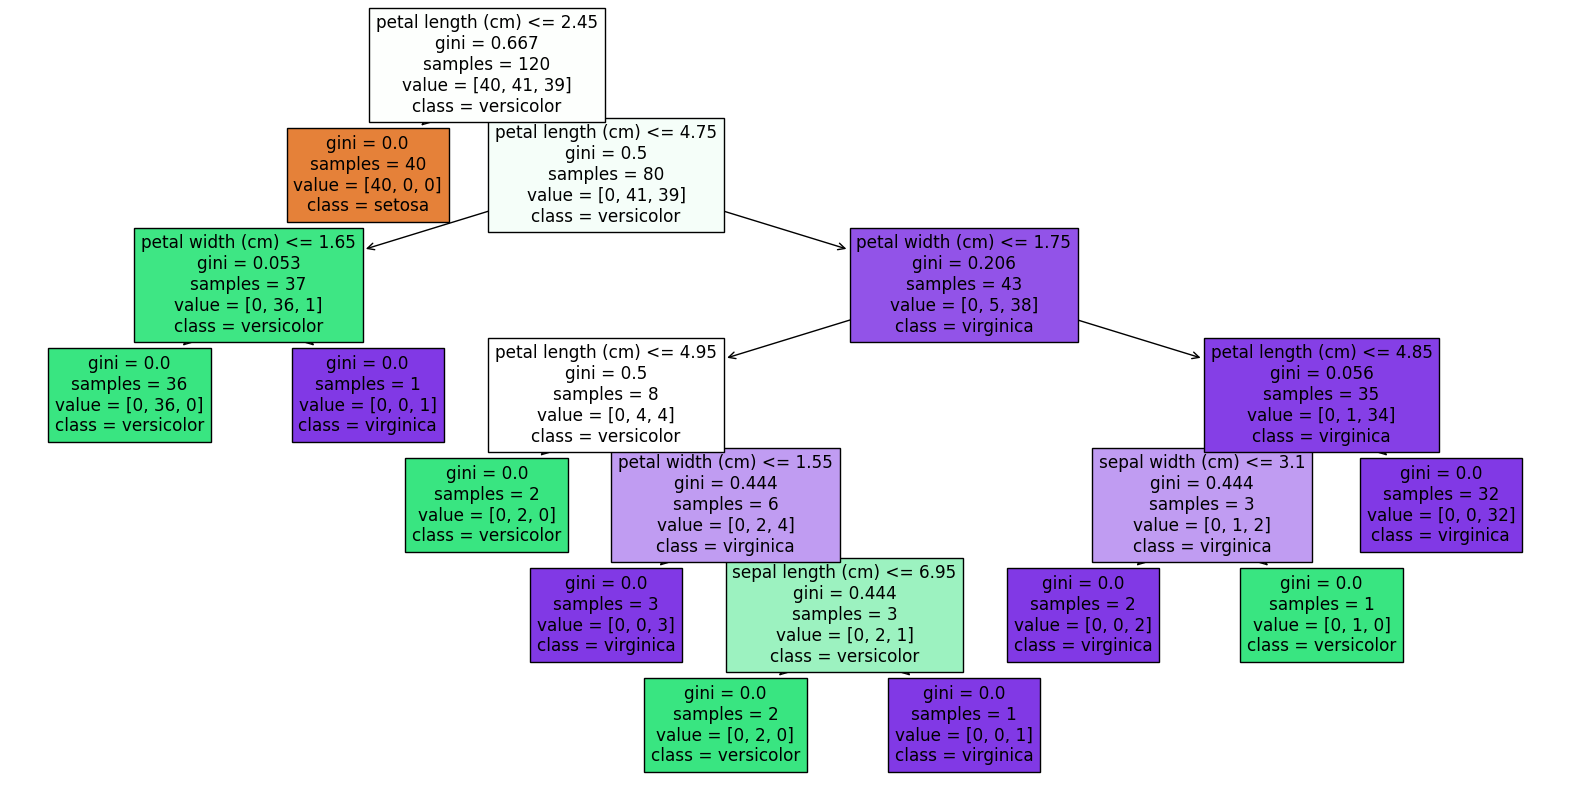

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar el conjunto de datos
iris = load_iris()
X = iris.data
y = iris.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=123)
model.fit(X_train, y_train)

# Crear la gráfica del árbol de decisión usando Matplotlib, filled=True le da
# colores a los rectangulos,
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


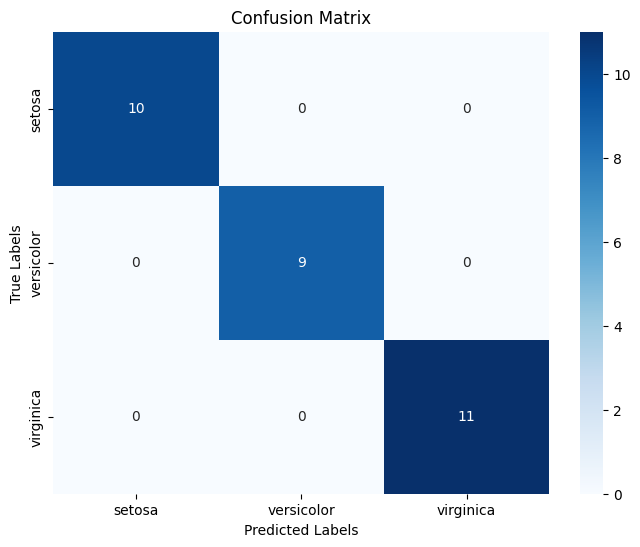

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

La clase predicha para la nueva muestra es: setosa


In [ ]:
# Realizar la predicción usando el modelo entrenado para el conjunto de prueba
# Donde X_test representa los datos de prueba. Estos son un conjunto de datos
#  Estos son un conjunto de datos separados del conjunto de entrenamiento
#  (X_train) y no se han utilizado durante el entrenamiento del modelo. La razón
#  de usar X_test es validar la capacidad del modelo para trabajar con nuevos datos,
#  es decir, para verificar cómo el modelo se desempeña en situaciones "reales".
y_pred = model.predict(X_test)


# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calcular y mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular y mostrar el informe de clasificación
cr = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(cr)

# Realizar la predicción usando el modelo entrenado para una muestra nueva
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])
y_pred_new_sample = model.predict(new_sample)
predicted_class_name = iris.target_names[y_pred_new_sample][0]
print(f"La clase predicha para la nueva muestra es: {predicted_class_name}")

In [ ]:
# El "Classification Report" es una representación visual de varias métricas clave
# para evaluar el rendimiento de un modelo de clasificación. El reporte proporciona
# cuatro tipos de métricas: precisión, recall, f1-score y support para cada clase
# en el conjunto de datos. También incluye tres métricas adicionales para evaluar
# el rendimiento general: la precisión general (accuracy), el promedio macro y el
# promedio ponderado. Aquí te explico cada uno de estos datos para el ejemplo dado:

# 1. Precision
# Definición: La precisión indica la capacidad del clasificador de no etiquetar
# como positivo un ejemplo que es negativo. En otras palabras, es la proporción
# de los verdaderos positivos frente a todos los positivos predichos (verdaderos
# positivos + falsos positivos).
# Valores del ejemplo:
# Setosa: 1.00
# Versicolor: 1.00
# Virginica: 1.00
# Esto significa que para cada clase, el 100% de las instancias clasificadas como
# pertenecientes a una clase efectivamente pertenecen a esa clase.

# 2. Recall
# Definición: El recall es la capacidad del clasificador para encontrar todas las
# instancias positivas. Por ejemplo, el recall de una clase se calcula como la
# proporción de verdaderos positivos dividida por la suma de los verdaderos
# positivos y los falsos negativos (las instancias positivas que el modelo no detectó).
# Valores del ejemplo:
# Setosa: 1.00
# Versicolor: 1.00
# Virginica: 1.00
# Esto indica que el modelo identificó correctamente el 100% de las muestras
# reales de cada clase.

# 3. F1-Score
# Definición: El F1-score es una medida que combina precisión y recall en un solo
# número. Es la media armónica de la precisión y el recall. Un F1-score alcanza
# su mejor valor en 1 (precisión y recall perfectos) y el peor en 0.
# Valores del ejemplo:
# Setosa: 1.00
# Versicolor: 1.00
# Virginica: 1.00
# Esto muestra que el modelo es perfecto en términos de precisión y recall para
# todas las clases.

# 4. Support
# Definición: El support es el número de ocurrencias reales de la clase en el
# conjunto de datos especificado.
# Valores del ejemplo:
# Setosa: 10
# Versicolor: 9
# Virginica: 11
# Esto indica cuántas instancias de cada clase están presentes en el conjunto de
# datos que se está evaluando.

# Métricas Adicionales:

# Accuracy:
# Valor: 1.00
# Muestra la proporción de todas las predicciones correctas (todas las clases)
# sobre todas las predicciones hechas.

# Macro Average:
# Valor: 1.00
# Calcula la media de las métricas para cada clase sin tener en cuenta la
# proporción de cada clase en el conjunto de datos (no ponderado).

# Weighted Average:
# Valor: 1.00
# Calcula la media de las métricas para cada clase ponderando cada una por su
# support (número de instancias reales).

# En resumen, este reporte sugiere que el modelo ha logrado un rendimiento
# perfecto en la clasificación de las muestras del conjunto de datos,
# identificando correctamente y sin errores todas las categorías de las flores de
# iris evaluadas.

# 7.- MODELO DE CLASIFICACION: RANDOM FOREST

In [ ]:
# El algoritmo de Random Forest es un método de aprendizaje automático que opera
# construyendo múltiples árboles de decisión durante el entrenamiento y generando
# la salida (clasificación o regresión) basada en la moda (el valor que aparece
# con más frecuencia) o el promedio de las predicciones de todos los árboles. Este
# enfoque se conoce como ensamblaje, ya que combina las predicciones de varios
# modelos básicos para mejorar la robustez y la precisión general del modelo.

In [ ]:
# Importando los paquetes necesarios.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Importamos SGDClassifier de sklearn.linear_model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
# Mejor para que no falle en el google colab!

In [ ]:
!wget -O winequality-red.csv https://raw.githubusercontent.com/CharlieScot/Intelligencia-Artificial/main/MODULO_4/winequality-red.csv?token=GHSAT0AAAAAACK7WEBRR7DZWHDPT36RAU7GZLIPLCQ

--2024-05-01 18:37:33--  https://raw.githubusercontent.com/CharlieScot/Intelligencia-Artificial/main/MODULO_4/winequality-red.csv?token=GHSAT0AAAAAACK7WEBRR7DZWHDPT36RAU7GZLIPLCQ
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [text/plain]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  98.58K  --.-KB/s    in 0.01s   

2024-05-01 18:37:33 (8.64 MB/s) - ‘winequality-red.csv’ saved [100951/100951]



In [ ]:
df=pd.read_csv('winequality-red.csv', sep=',')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Preprocesamiento de datos.
# Los vinos con una calificación de calidad entre 2 y 6.5 (incluyendo 6.5) se
# considerarán "malos", mientras que los vinos con una calificación entre 6.5
#(sin incluir) y 8 se considerarán "buenos"

bins= (2, 6.5, 8)
group_names= ['bad', 'good']
df['quality']=pd.cut(wine['quality'], bins=bins, labels=group_names)
# La función cut() se aplica a la columna quality del DataFrame. Los argumentos
# de la función son:
# wine['quality']: La columna que se va a procesar.
# bins=bins: Los intervalos que se usarán para dividir los datos de calidad.
# labels=group_names: Las etiquetas que se asignarán a los datos en cada bin
# correspondiente.

df['quality'].unique()
# Este comando se utiliza para verificar los valores únicos que ahora existen en
# la columna quality del DataFrame df. Ayuda a confirmar que la transformación se
# ha realizado correctamente y que sólo existen las categorías "bad" y "good".

['bad', 'good']
Categories (2, object): ['bad' < 'good']

A continuación, se utiliza `LabelEncoder() que es una clase en la biblioteca scikit-learn de Python que se utiliza para convertir etiquetas de clases categóricas en números.

In [ ]:
label_quality = LabelEncoder()

En el siguiente snippet, asignamos etiquetas numéricas (0, 1) a nuestra variable "calidad" (quality). El método `fit_transform()` de la clase `LabelEncoder` ajusta el codificador a las categorías y luego transforma las categorías en números. Como solo tenemos dos grupos (*bad y good*), se asignan los valores `0` y `1`.

In [ ]:
df['quality'] = label_quality.fit_transform(df['quality'])

# Malos se convierten en O y buenos en 1

In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [ ]:
# Contamos los diferentes valores que hay en cada categoria de la
# variable 'quality'.

df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

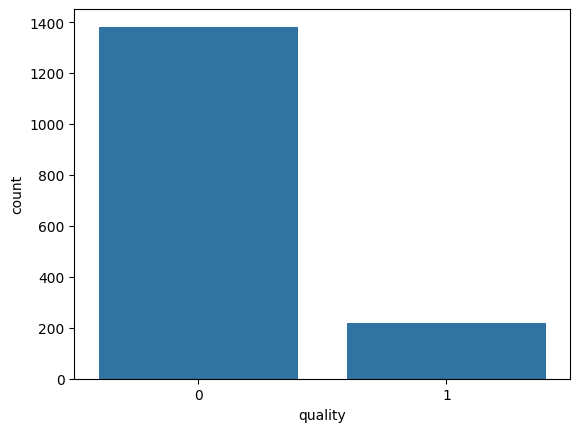

In [ ]:
sns.countplot(df, x=df['quality'])

In [ ]:
# Ahora separamos el conjunto de datos como variable de respuesta y variables de
# características.

X = df.drop('quality', axis = 1)
y = df['quality']

In [ ]:
# Entrenar y probar la división de datos.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Aplicamos el escalado standard para obtener los datos optimizados.
# La mayoria de los modelos necesitan scaling, los valores de nuestra base de
# datos son muy grandes comparados con otros y eso puede hacer que el modelo
# se concentre demasiado en los valores grandes.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [ ]:
#ahora los valores estan menos dispersos y oscilan entre -2 y 4 mas o menos.

X_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

Random Forest (Bosque Aleatorio) es un algoritmo de aprendizaje supervisado que se utiliza tanto para tareas de clasificación como para regresión. Pertenece a la categoría de métodos de conjunto (ensemble methods), que combinan varios modelos para mejorar el rendimiento y la generalización del modelo.

Aquí hay algunas características clave del algoritmo Random Forest:

1.  **Construcción de Árboles de Decisión**: Cada árbol de decisión en el bosque se construye utilizando una muestra aleatoria del conjunto de datos de entrenamiento. Además, en cada paso de la construcción del árbol, se selecciona aleatoriamente un subconjunto de características para elegir la mejor división. Esto ayuda a decorrelacionar los árboles y mejorar la generalización del modelo.

2.   **Votación o Promedio**: En el caso de clasificación, cada árbol en el bosque emite una predicción de clase y la clase final se determina por votación. En el caso de regresión, las predicciones de los árboles se promedian para obtener la predicción final.

3.   **Manejo de Overfitting**: Al construir múltiples árboles y combinar sus resultados, Random Forest tiende a ser más robusto y menos propenso al sobreajuste (overfitting) en comparación con un solo árbol de decisión.

4.   **Importancia de las Características**: Random Forest proporciona una medida de la importancia de cada característica en el proceso de toma de decisiones. Esto puede ser útil para la selección de características y la comprensión del modelo.

5.    **Versatilidad**: Random Forest es versátil y se puede aplicar a una variedad de problemas, incluyendo clasificación y regresión. Además, es menos propenso a sobreajuste que un árbol de decisión único.

Para utilizar Random Forest en scikit-learn, puedes usar la clase `RandomForestClassifier` para problemas de clasificación o `RandomForestRegressor` para problemas de regresión. Estas implementaciones permiten ajustar el número de árboles en el bosque, así como otros parámetros importantes.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# El parámetro n_estimators en el contexto de los algoritmos Random Forest
# indica el número de árboles que se deben construir en el bosque. Cada árbol
# en el bosque se construye utilizando una muestra aleatoria del conjunto de
# datos de entrenamiento, y el parámetro n_estimators controla cuántos de estos
# árboles se construirán.

model = RandomForestClassifier(n_estimators=200)


# Se utiliza la función cross_val_score() para realizar la validación cruzada
# k-fold con k=5. Esta función toma el clasificador, las características (X),
# las etiquetas (y), y el número de folds (cv) como argumentos.
# Devuelve una matriz de puntuaciones, donde cada elemento es la puntuación del
# modelo en un fold específico.

scores = cross_val_score(model, X, y, cv=200)

In [ ]:
print("Precisión en cada fold:", scores)
print("Precisión media:", scores.mean())

Precisión en cada fold: [0.875 0.875 0.875 0.875 0.875 0.875 1.    0.875 1.    1.    0.875 0.875
 1.    1.    0.875 0.875 1.    1.    1.    0.875 1.    1.    1.    1.
 1.    0.875 0.875 0.875 0.875 0.875 1.    0.875 1.    1.    1.    0.875
 1.    0.875 1.    0.875 0.875 1.    0.875 1.    0.875 0.875 0.875 0.75
 0.75  0.875 0.875 1.    0.75  1.    1.    0.875 1.    1.    1.    0.875
 0.875 0.875 1.    1.    1.    1.    0.875 0.875 1.    0.5   0.875 0.875
 0.875 1.    0.875 1.    0.875 0.875 0.875 0.875 1.    1.    1.    0.875
 1.    1.    0.875 0.875 1.    1.    0.875 1.    0.875 0.875 0.875 0.875
 1.    1.    0.875 1.    1.    1.    1.    1.    0.875 1.    0.875 1.
 1.    1.    0.875 0.875 0.75  1.    0.75  0.625 1.    0.875 1.    1.
 0.75  0.875 1.    0.875 0.875 0.75  0.875 0.875 0.875 0.875 1.    0.5
 0.875 0.875 1.    1.    1.    1.    0.875 0.875 1.    0.875 1.    0.875
 0.875 0.875 0.75  0.75  0.75  1.    1.    0.875 1.    1.    0.75  1.
 1.    1.    0.75  1.    1.    0.875 1.   

In [ ]:
# Entrenamos el modelo con el método fit().

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
X_test[:10]

array([[-0.33399129,  0.24258119, -0.96313679,  0.02140418,  0.83730066,
        -0.16962178,  0.00884052,  0.23074469, -0.44256111,  0.0634928 ,
        -0.75508835],
       [-0.27864317, -0.09492307, -0.49458376, -0.6712254 , -0.04244065,
         0.46521996,  1.72151211, -0.31812766,  0.51996419, -1.15964614,
        -0.84471308],
       [ 1.32645219,  0.86133899, -0.23427652,  0.17532186,  0.64485725,
         0.10245325, -0.35816054,  1.87736173, -0.1858877 ,  2.23796204,
        -0.48621416],
       [ 0.10879364, -0.31992591,  0.23427652, -0.17099293, -0.15240831,
         1.46282842,  0.37584158,  0.67982206,  0.13495407, -0.75193316,
        -0.57583889],
       [-0.88747245, -0.31992591, -0.13015362, -0.59426656, -0.17990022,
         0.19314493, -0.35816054, -0.91689749,  0.51996419, -0.34422018,
         0.14115895],
       [-0.61073187, -0.60117946,  0.18221507, -0.28643119, -0.01494873,
         1.73490345,  0.80400947,  0.1808472 ,  0.84080596, -0.88783749,
        -0.934

La función `classification_report()` de scikit-learn proporciona un informe detallado de diversas métricas de evaluación del rendimiento de un modelo de clasificación. Este informe incluye métricas como `precision`, `recall`, `F1-score` y `support` para cada clase del problema de clasificación.

Os doy una explicación simple de las métricas que se incluyen en el `classification_report`:

`Precision` (Precisión): Es la proporción de instancias positivas correctamente clasificadas respecto al total de instancias clasificadas como positivas. Mide la exactitud de las predicciones positivas. Valores entre `0` (impreciso) y `1`(Precisión) .

`Recall` (Sensibilidad o Tasa de Verdaderos Positivos): Es la proporción de instancias positivas correctamente clasificadas respecto al total de instancias que son realmente positivas. Mide la capacidad del modelo para capturar todas las instancias positivas. Valores entre `0` (Baja sensibilidad) y `1` (Alta sensibilidad).

`F1-score`: Es la media armónica ponderada de precisión y recall. Proporciona un equilibrio entre ambas métricas y es útil cuando hay un desequilibrio entre las clases. Valores entre `0` (Desequilibrio) y `1` (Equilibrio).

`Support` (Soporte): Es el número real de ocurrencias de las clases en el conjunto de datos de prueba.

In [ ]:
# Veamos el desempeño de nuestro modelo.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.62      0.38      0.47        47

    accuracy                           0.88       320
   macro avg       0.76      0.67      0.70       320
weighted avg       0.86      0.88      0.86       320



In [ ]:
# Matriz de confusión para la clasificación aleatoria de bosques.

# Vemos que el modelo es bueno prediciendo vino malo (263,10) pero el modelo es
# malo prediciendo vino bueno (32, 15).

print(confusion_matrix(y_test, y_pred))

[[262  11]
 [ 29  18]]


In [ ]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, y_pred)

cm

0.875

In [ ]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,2
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,4
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,4
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,2


In [ ]:
# Probando un ejemplo.

Xnew = [[7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]]
ynew = model.predict(Xnew)

In [ ]:
print('La calidad del vino con los parámetros dados es:', ynew)

La calidad del vino con los parámetros dados es: [0]


# 8.- MODELO DE CLASIFICACION. SUPPORT VECTOR MACHINE (SVM)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Cargar y preparar los datos
# Cargar Datos: load_digits() carga el conjunto de datos de dígitos, que incluye
# imágenes de dígitos escritos a mano (cada imagen es una matriz de 8x8 píxeles,
# que se aplana a un vector de 64 características).
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler() se usa para normalizar los datos de entrenamiento y prueba,
# lo que es un paso crucial en muchos algoritmos de aprendizaje automático para
# ayudar al modelo a converger más rápido.

# Ajuste y Transformación: fit_transform() ajusta el escalador a los datos de
# entrenamiento y los transforma. transform() se usa luego para transformar los
# datos de prueba usando el mismo escalador (sin ajustarlo nuevamente),
# garantizando que ambos conjuntos de datos sean tratados de manera equivalente.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo SVM
# Instancia de SVC: SVC(kernel='linear') crea una instancia del clasificador SVM
# con un kernel lineal. Esto significa que el modelo intentará encontrar un
# hiperplano lineal que separe las clases.
#El kernel es una función que transforma los datos para que puedan ser separados
#de manera más efectiva por un hiperplano en un espacio de mayor dimensión.
# el término "kernel" se refiere a una función que transforma el espacio de
# características de los datos de entrada para facilitar la separación lineal de
# las clases, incluso si los datos no son linealmente separables en su espacio
# original.
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [ ]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
X_test_scaled

array([[ 0.        , -0.34169755, -1.08739895, ...,  1.22242526,
         0.70096084, -0.19710003],
       [ 0.        , -0.34169755,  1.20074205, ..., -0.98396375,
        -0.50623083, -0.19710003],
       [ 0.        , -0.34169755,  0.57670359, ...,  0.20409187,
        -0.50623083, -0.19710003],
       ...,
       [ 0.        , -0.34169755,  0.36869078, ...,  0.54353633,
        -0.50623083, -0.19710003],
       [ 0.        , -0.34169755,  0.36869078, ...,  1.56186972,
         0.45952251, -0.19710003],
       [ 0.        , -0.34169755,  1.8247805 , ..., -0.30507483,
        -0.50623083, -0.19710003]])

In [ ]:
x_test_scaled=[-0.0584, 0.4491, -1.992, -0.644,
               0.7313, 0.947, 1.0464, -1.1902,
               1.7151, 0.2598, 0.3966, -0.8714,
               1.0956, 1.6113, 0.6357, -0.0337,
               -1.0587, 0.5045, -0.5198, -0.7775,
               -1.8697, 1.3559, 0.991, 0.6798,
               0.4102, 0.7324, -0.001, 0.6614,
               -0.4659, -0.6344, 1.0275, -0.4834,
               -0.4644, -0.6341, -0.4546, 0.5933,
               -0.9422, -0.7072, -0.8759, 0.7544,
               0.6505, 0.663, -0.2701, -0.6336,
               0.0277, 1.8893, -0.7584, 2.1615,
               0.019, 0.9062, -0.1561, -0.896,
               1.0321, 0.0602, 0.1037, -1.1958,
               -0.5032, -0.2454, -0.5485, -0.5074,
               0.1783, -0.8583, -0.8265, -0.1328]

y_pred = model.predict(X_test_scaled)
y_pred

# Este array tiene 360 elementos

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 3, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 5, 1, 5,
       5, 1, 0, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

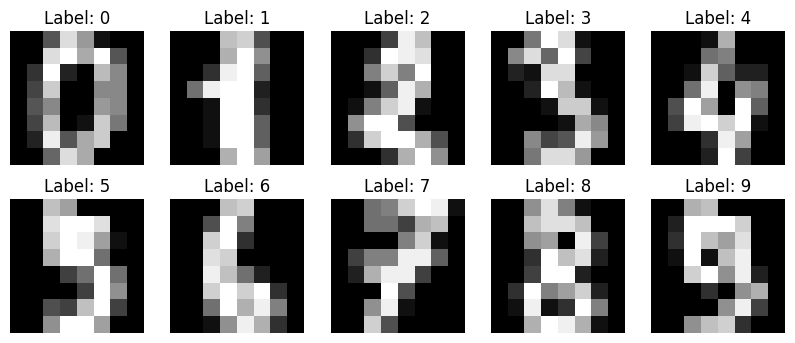

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Seleccionar cuántas imágenes mostrar
num_images = 10

for i in range(num_images):
    # Subplot para cada imagen
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.axis('off')  # Desactivar los ejes para mejor claridad
    plt.title(f'Label: {digits.target[i]}')

# Mostrar las imágenes
plt.show()

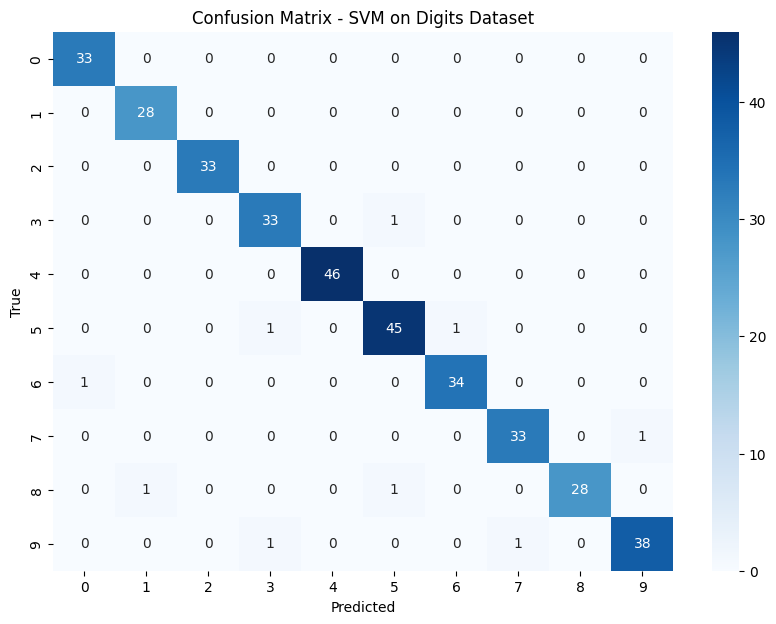

In [ ]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)


# Visualizar la matriz de confusión como un mapa de calor
# Cuando se establece annot=True, Seaborn añade anotaciones a cada celda de la
# matriz de calor; en otras palabras, los valores numéricos son escritos
# directamente en las celdas correspondientes de la visualización.
# La suma de los numeros en todas las celdas da 360
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM on Digits Dataset')
plt.show()

# 9.- REDUCCION DE DIMENSIONALIDAD. PCA   10.- MODELO DE CLASIFICACION. NAIVE BAYES


In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Cargar el conjunto de datos de diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Convertir en DataFrame para una mejor visualización
df = pd.DataFrame(X, columns=diabetes.feature_names)

# EDA (EXPLORATORY DATA ANALYSIS)

# Mostrar las primeras filas del DataFrame
print(df.head())

# Mostrar una descripción estadística del DataFrame
print(df.describe())
print(df.info())


# Mostrar las dimensiones del DataFrame
print("Dimensiones del DataFrame:", df.shape)

# Información sobre el vector objetivo
print("Información sobre el vector objetivo:")
print(f"Media de la progresión de la enfermedad: {y.mean()}")
print(f"Desviación estándar de la progresión de la enfermedad: {y.std()}")
print(f"Mínimo de la progresión de la enfermedad: {y.min()}")
print(f"Máximo de la progresión de la enfermedad: {y.max()}")

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164

In [ ]:
# age: edad
# sex: genero
# bmi: Body Mass Index
# bp: Blood Pressure
# s1: Podría ser LDL, colesterol "malo", que es una medida común en estudios relacionados con el corazón y el metabolismo.
# s2: A menudo se refiere al HDL, colesterol "bueno".
# s3: Comúnmente se relaciona con los triglicéridos, otro tipo de lípido en la sangre.
# s4: Podría indicar la medida de una hormona o enzima específica, como la insulina en suero.
# s5: Esta podría ser una medida de la glucemia, como la hemoglobina A1c, que refleja el nivel promedio de azúcar en sangre durante los últimos tres meses.
# s6: Puede ser la glucosa en suero después de una prueba de tolerancia a la glucosa.

In [ ]:
# Cargar Dataset: Utiliza load_diabetes() para obtener el conjunto de datos.

# Escalar: Se estandarizan las características para que tengan media cero y
# varianza unitaria, lo cual es crucial antes de aplicar PCA.

# PCA: Se aplica PCA para reducir las 10 características originales a solo 2
# componentes principales.

# Visualización: Se utiliza un gráfico de dispersión para mostrar los dos
# componentes principales, con puntos coloreados según la medida de progresión de
# la enfermedad. Esto permitirá visualizar si hay alguna estructura o agrupación
# notable en el espacio reducido.

import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Cargar el conjunto de datos
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target  # Este será usado solo para colorear las muestras en el gráfico

# 2. Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar PCA
pca = PCA(n_components=2)  # Reducir a dos dimensiones
X_pca = pca.fit_transform(X_scaled)



In [ ]:
X_pca

array([[ 5.87199129e-01, -1.94683220e+00],
       [-2.83162538e+00,  1.37208173e+00],
       [ 2.72128549e-01, -1.63490124e+00],
       [ 4.92811447e-02,  3.82278029e-01],
       [-7.56421355e-01,  8.11960246e-01],
       [-3.96632094e+00, -3.81060110e-01],
       [-1.99381728e+00, -8.05533094e-01],
       [ 2.07586679e+00,  1.82790486e+00],
       [ 6.03010049e-01, -8.81245906e-01],
       [-2.12142303e-01, -4.92889267e-01],
       [-3.85620452e+00, -1.53208525e+00],
       [ 3.96911264e-01, -6.32534772e-01],
       [-1.59635877e+00,  9.81463428e-01],
       [ 3.18460780e-01, -6.51091260e-01],
       [-1.68543640e+00,  1.81793194e+00],
       [ 2.95362637e+00,  9.50066264e-01],
       [ 1.59459664e-01,  9.12303004e-01],
       [ 2.28818146e+00, -1.48606265e-01],
       [-1.15615929e+00, -4.28300555e-01],
       [-1.77156480e+00,  9.28850469e-01],
       [-2.00974666e+00, -2.90000932e-01],
       [-1.93153274e+00, -8.31328161e-01],
       [-1.67615322e+00,  7.19679514e-01],
       [ 3.

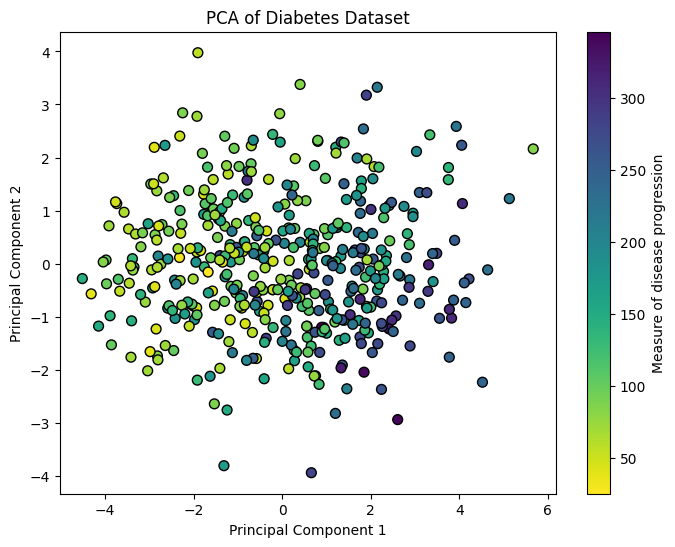

In [ ]:
# 4. Visualizar los resultados
plt.figure(figsize=(8, 6))   # en pulgadas
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c= y, edgecolor='k', cmap='viridis_r', s=50)
plt.title('PCA of Diabetes Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Measure of disease progression')
plt.show()

10.- MODELO DE CLASIFICACION. NAIVE BAYES GAUSSIAN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import numpy as np

# Cargar datos
irisdata = load_iris()
X = irisdata.data
y = irisdata.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Inicializar el clasificador Gaussian Naive Bayes
model = GaussianNB()

# Entrenar el modelo
model.fit(X_train, y_train)


GaussianNB()

In [ ]:
irisdata

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# Datos nuevos
# largo_sepalo = np.array([5.1, 4.9, 5.8])
# ancho_sepalo = np.array([3.5, 3.3, 3.3])
# largo_petalo = np.array([1.4, 1.5, 5.2])
# ancho_petalo = np.array([0.2, 0.3, 1.9])

# Combinar datos en un array
#new_data =np.array([[5.8, 3.3, 5.2, 1.9], [4.9, 3.3, 1.5, 0.3], [5.1, 3.5, 1.4, 0.2]])

# Predicción de la clase para cada punto de datos nuevos
y_pred = model.predict(X_test)

# Mostrar las predicciones
y_pred


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [ ]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print('y_pred shape:', y_pred.shape)

X_test shape: (30, 4)
y_test shape: (30,)
y_pred shape: (30,)


10B.- CLASIFICACION HAM O SPAM

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer en scikit-learn es una clase. Esta clase implementa tanto el
# método de vectorización de documentos de texto utilizando la medida TF-IDF como
# las funcionalidades necesarias para ajustar el modelo a un conjunto de datos y
# transformar esos datos en la matriz TF-IDF. Como tal, encapsula tanto el
# algoritmo de cálculo de TF-IDF como las estructuras de datos necesarias para


In [ ]:
df=pd.read_csv('spam[1].csv', encoding='latin-1', index_col=0)
df.head(4)
# encoding='latin-1': Especifica el tipo de codificación de caracteres del archivo.
# Algunos archivos pueden contener caracteres que no están en el formato estándar
# UTF-8, y en esos casos, puede ser necesario especificar una codificación diferente. latin-1 también conocido como ISO-8859-1 es una de tales codificaciones.
# index_col=0: Este argumento especifica que la primera columna del archivo CSV
# debe ser usada como índice del DataFrame. Los índices en pandas son como etiquetas
#  que ayudan a identificar cada fila de datos. Si se omite este parámetro, pandas
#  generará automáticamente un índice secuencial para cada fila.

,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
v1,,,,
ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [ ]:
#Eliminamos columnas sobrantes
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.head(4)

,v2
v1,
ham,"Go until jurong point, crazy.. Available only ..."
ham,Ok lar... Joking wif u oni...
spam,Free entry in 2 a wkly comp to win FA Cup fina...
ham,U dun say so early hor... U c already then say...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5572 entries, ham to ham
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v2      5572 non-null   object
dtypes: object(1)
memory usage: 87.1+ KB


In [ ]:
#Vemos si hay celdas nulas o vacias
df.isnull().sum()

v2    0
dtype: int64

In [ ]:
#Eliminamos duplicados
df=df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, ham to ham
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v2      5169 non-null   object
dtypes: object(1)
memory usage: 80.8+ KB


In [ ]:
#Reseteamos los indices
df=df.reset_index()

In [ ]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [ ]:
#Le damos nombres a las columnas v1 y v2
df.columns=['Categoria','Mensaje']

df.head(4)

,Categoria,Mensaje
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


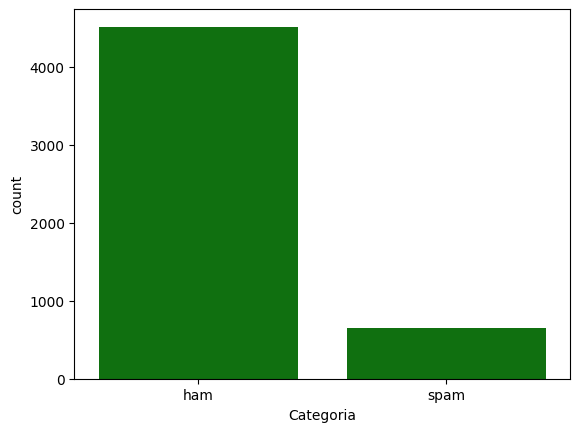

In [ ]:
#Creamos gráfica con la libreria seaborn
sns.countplot(data=df,x='Categoria',color='g')

plt.show()

In [ ]:
#Este código transforma una columna de texto ('Categoria') que tiene valores
# categóricos ('spam' y 'ham') en valores numéricos (0 y 1). Tambien se puede
# hacer de otra manera
# df['Categoria'] = df['Categoria'].replace({'spam': 0, 'ham': 1})
df.loc[df['Categoria']=='spam','Categoria']=0
df.loc[df['Categoria']=='ham','Categoria']=1

In [ ]:
#Queremos ver todo el email de la fila 21
df.iloc[21]['Mensaje']

'I\x89Û÷m going to try for 2 months ha ha only joking'

In [ ]:
X=df['Mensaje']
y=df['Categoria']

In [ ]:
#Dividimos la data entre entrenamiento y test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Vemos las diferentes shapes
print(X.shape)
print(X_test.shape)
print(X_train.shape)

(5169,)
(1034,)
(4135,)


In [ ]:
#min_df=1 significa que el término debe aparecer al menos en un documento para
#que se incluya

#"english", el vectorizador utilizará un conjunto predefinido de stop words para
#el inglés. Esto ayuda a mejorar la eficacia del análisis eliminando palabras
#como "and", "the", "is", etc.

#Aquí un resumen rápido del funcionamiento de TfidfVectorizer:

# Tokenización: Divide el texto en unidades básicas o tokens, generalmente palabras o términos.
# Filtrado de Stop Words: Elimina palabras que no son útiles para el análisis.
# Normalización: Convierte todas las palabras a minúsculas si lowercase=True.
# Cálculo de TF (Frecuencia del Término): Mide cuántas veces aparece un término en
# cada documento.
# Cálculo de IDF (Frecuencia Inversa del Documento): Evalúa qué tan importante es
# un término en el conjunto del corpus, penalizando los términos que aparecen en
# muchos documentos.
# Cálculo de TF-IDF: Combina TF e IDF para dar un peso a cada término en cada
# documento, reflejando su importancia relativa basándose en su frecuencia y unicidad.

clase = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [ ]:
#Ajustar el Modelo y Transformar el Conjunto de Entrenamiento
#fit(): Aprende o construye el modelo de vectorización a partir del conjunto de
#entrenamiento X_train
X_train_vectorizada = clase.fit_transform(X_train)

#Transformar el Conjunto de Pruebas
#Convierte los textos en X_train en una matriz de características TF-IDF usando
#el vocabulario y los IDFs aprendidos.

X_test_vectorizada = clase.transform(X_test)

In [ ]:
#El método .astype("int") se utiliza para cambiar el tipo de datos  en este caso,
# a enteros (int).

y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [ ]:
print(X_train)

2142                       Those were my exact intentions
5130                            What about this one then.
2067                   Waaaat?? Lololo ok next time then!
4714    Free video camera phones with Half Price line ...
4708    Tick, tick, tick .... Where are you ? I could ...
                              ...                        
4426    Many more happy returns of the day. I wish you...
466     Nice line said by a broken heart- Plz don't cu...
3092                    Ok then i come n pick u at engin?
3772    Eek that's a lot of time especially since Amer...
860     U have a Secret Admirer who is looking 2 make ...
Name: Mensaje, Length: 4135, dtype: object


In [ ]:
#Instanciamos el modelo (algoritmo de clasificacion)
model=LogisticRegression()
model.fit(X_train_features,y_train)

LogisticRegression()

In [ ]:
#Predecimos
#Argumento: X_train_features es la matriz de características del conjunto de
# entrenamiento, probablemente transformada en pasos previos
#predict_train_data contiene las predicciones del modelo para cada ejemplo en el
# conjunto de entrenamiento. Estas predicciones son lo que el modelo cree que
# son las etiquetas correctas para cada entrada basándose en lo que aprendió
# durante el entrenamiento.
predict_train_data=model.predict(X_train_features)

accuracy_train_data=accuracy_score(y_train,predict_train_data)
#Tambien se usa accuracy_score para comparar y_test y predict_test_data
#(predicciones del conjunto de prueba) para evaluar la capacidad del modelo de
#generalizar a nuevos datos.
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9613059250302297


In [ ]:
# predicion= ['You won a prize!!']
mensajes=["Congratulations on your recent achievement! Well done.",
          "You have won the prize.",
          'Hello, I am teacher of your son.']

new_data_feature=clase.transform(mensajes)

predicion=model.predict(new_data_feature)

print(predicion)

for i in range(len(predicion)):
  if(predicion[i]==1):
      print("Ham Mail")
  else:
      print("Spam Mail")

[1 0 1]
Ham Mail
Spam Mail
Ham Mail


# 11.- MODELO DE CLUSTERIZACION. K-MEANS

**K-means** es un algoritmo de aprendizaje automático que se utiliza para agrupar datos en diferentes grupos o "clusters". Imagina que tienes un montón de puntos en un papel y quieres agruparlos en diferentes círculos, donde cada círculo contiene puntos que están cerca entre sí. K-means hace algo similar con datos en un espacio multidimensional.

Aquí te explico cómo funciona de manera sencilla:

1.  **Número de Clusters** (*K*): Primero, decides cuántos grupos (clusters) quieres crear. Este número se llama "K".

2.  **Puntos Iniciales** (*Centroides*): El algoritmo selecciona al azar "K" puntos como los centros iniciales de estos grupos. Estos puntos se llaman centroides.

3.   **Asignación de Puntos a los Clusters**: Cada punto de tus datos se asigna al centroide más cercano. Esto forma grupos iniciales.

4.   **Actualizar Centroides**: Una vez todos los puntos están asignados, el algoritmo recalcula la posición de cada centroide como el centro (promedio) de todos los puntos asignados a ese cluster.

5.   **Repetir el Proceso**: El algoritmo repite los pasos 3 y 4, reasignando puntos a los centroides más cercanos y recalculando la posición de los centroides, hasta que los grupos no cambian mucho o se alcanza un número máximo de iteraciones.

El resultado es un conjunto de grupos donde los puntos dentro de cada grupo son lo más similares posible entre sí, y lo más diferentes posible de los puntos en otros grupos. Es útil para encontrar patrones naturales en los datos o para preagrupar datos antes de aplicar otros análisis más complejos.

IMPORTAR LIBRERIAS Y MODELO

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

GENERAR DATOS FICTICIOS CON NUMPY

La función `seed()` establece la semilla, al fijar la semilla del generador de números aleatorios, aseguras que los resultados sean reproducibles. Es decir, cada vez que ejecutes el código, obtendrás la misma secuencia de números aleatorios.

Esto es muy útil para depurar o para cuando quieres que los resultados de un experimento sean consistentes para su revisión o comparación.

In [ ]:
np.random.seed(42)


La función `normal()` de NumPy es utilizada para generar muestras aleatorias de una distribución normal (o gaussiana).

Por ejemplo, `np.random.normal(0, 1, 10)` generaría un arreglo de 10 muestras aleatorias de una distribución normal con media 0 y desviación estándar 1.

Grupo 1: Jovenes que gastan poco

In [ ]:
edad_grupo1=np.random.normal(25, 5, 100)
gasto_grupo1=np.random.normal(200, 30, 100)

Grupo 2: Edad media que gastan medio

In [ ]:
edad_grupo2=np.random.normal(45, 5, 100)
gasto_grupo2=np.random.normal(300, 50, 100)

Grupo3: Mayores que gastan mucho

In [ ]:
edad_grupo3=np.random.normal(65, 8, 100)
gasto_grupo3=np.random.normal(500, 50, 100)

En el  siguiente snippet, la función `np.concatenate()` se utiliza para unir los arrays de `edad_grupox` y `gasto_grupox` creados anteriormente.

Primero, combina los tres arrays de edad en uno solo (`edad`) y luego hace lo mismo con los tres arrays de gasto, resultando en un único array de gasto (`gasto`).

Después, `zip(edad, gasto)` toma los elementos correspondientes de los arrays `edad` y `gasto` y los agrupa en pares. Cada par consiste en un elemento de edad y el elemento correspondiente de gasto.

Por ejemplo, si `edad = [25, 30, 35]` y `gasto = [100, 150, 200]`, entonces la sentencia `list(zip(edad, gasto))` creará la lista `[(25, 100), (30, 150), (35, 200)]`.

In [ ]:
edad=np.concatenate([edad_grupo1, edad_grupo2, edad_grupo3])
gasto=np.concatenate([gasto_grupo1, gasto_grupo2, gasto_grupo3])

X=np.array(list(zip(edad, gasto)))

In [ ]:
X

array([[ 27.48357077, 157.53887774],
       [ 24.30867849, 187.38064032],
       [ 28.23844269, 189.7185645 ],
       [ 32.61514928, 175.93168192],
       [ 23.82923313, 195.16142865],
       [ 23.82931522, 212.1215257 ],
       [ 32.89606408, 256.58557704],
       [ 28.83717365, 205.23733438],
       [ 22.65262807, 207.72651172],
       [ 27.71280022, 197.76662253],
       [ 22.68291154, 142.43686354],
       [ 22.67135123, 199.20458374],
       [ 26.20981136, 201.8069063 ],
       [ 15.43359878, 273.89726337],
       [ 16.37541084, 194.22917106],
       [ 22.18856235, 209.04642027],
       [ 19.9358444 , 198.95864691],
       [ 26.57123666, 164.93965887],
       [ 20.45987962, 234.28468444],
       [ 17.93848149, 222.55799098],
       [ 32.32824384, 223.73095841],
       [ 23.8711185 , 172.71837636],
       [ 25.33764102, 242.08382933],
       [ 17.87625907, 157.94446812],
       [ 22.27808638, 217.60571281],
       [ 25.55461295, 265.71366877],
       [ 19.24503211, 170.28391025],
 

In [ ]:
X[:20]

array([[ 27.48357077, 157.53887774],
       [ 24.30867849, 187.38064032],
       [ 28.23844269, 189.7185645 ],
       [ 32.61514928, 175.93168192],
       [ 23.82923313, 195.16142865],
       [ 23.82931522, 212.1215257 ],
       [ 32.89606408, 256.58557704],
       [ 28.83717365, 205.23733438],
       [ 22.65262807, 207.72651172],
       [ 27.71280022, 197.76662253],
       [ 22.68291154, 142.43686354],
       [ 22.67135123, 199.20458374],
       [ 26.20981136, 201.8069063 ],
       [ 15.43359878, 273.89726337],
       [ 16.37541084, 194.22917106],
       [ 22.18856235, 209.04642027],
       [ 19.9358444 , 198.95864691],
       [ 26.57123666, 164.93965887],
       [ 20.45987962, 234.28468444],
       [ 17.93848149, 222.55799098]])

La función `fit()` en K-means realiza el proceso central de agrupación: encuentra los centroides de los clusters y asigna cada punto de entrada a un cluster, basándose en la cercanía a estos centroides. El resultado es un conjunto de datos dividido en grupos que pueden ser utilizados para análisis o toma de decisiones posteriores.

El atributo `cluster_centers_` de KMeans almacena la ubicación de los centroides de los clusters que se han encontrado durante la ejecución del algoritmo KMeans mediante la función `fit()`.

El atributo `labels_` proporciona información sobre la asignación de cada punto de datos a uno de estos clusters. Cada elemento en `labels_` es un entero que representa el índice del cluster al que ha sido asignado un punto de datos específico.

En resumen, el atributo `labels_` te dice a qué cluster pertenece cada punto de datos en tu conjunto.

In [ ]:
model=KMeans(n_clusters=3)   # Creamos un objeto KMeans y fijamos el número de clusters en 3
model.fit((X))
centroids=model.cluster_centers_
labels=model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Visualizamos la matriz de los centroides

centroids

array([[ 63.90089022, 494.81285859],
       [ 44.86614241, 308.99865436],
       [ 26.15161608, 199.71292273]])

In [ ]:
labels

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [ ]:
# Visualizamos los primeros 20 arrays de la matriz X

X[:20]

array([[ 27.48357077, 157.53887774],
       [ 24.30867849, 187.38064032],
       [ 28.23844269, 189.7185645 ],
       [ 32.61514928, 175.93168192],
       [ 23.82923313, 195.16142865],
       [ 23.82931522, 212.1215257 ],
       [ 32.89606408, 256.58557704],
       [ 28.83717365, 205.23733438],
       [ 22.65262807, 207.72651172],
       [ 27.71280022, 197.76662253],
       [ 22.68291154, 142.43686354],
       [ 22.67135123, 199.20458374],
       [ 26.20981136, 201.8069063 ],
       [ 15.43359878, 273.89726337],
       [ 16.37541084, 194.22917106],
       [ 22.18856235, 209.04642027],
       [ 19.9358444 , 198.95864691],
       [ 26.57123666, 164.93965887],
       [ 20.45987962, 234.28468444],
       [ 17.93848149, 222.55799098]])

In [ ]:
# Visualizamos el elemento 0 del array 1.

X[1][0]

24.308678494144075

In [ ]:
# Visualizamos el elemento 1 del array 4.

X[4][1]

195.16142865001973

In [ ]:
# Visualizamos el array 6 de la matriz X

X[:][6]

array([ 32.89606408, 256.58557704])

In [ ]:
# Visualizamos los 20 primeros elementos de todas las filas del array X,
# de la matriz. El primer corchete representa las filas (con ':' seleccionamos
# todas las filas) y la columna 0 de la matriz X, que contiene los valores
# de la edad.
# Y el segundo corchete muestra los primeros 20 elementos ([:20]) de la columna
# 0 de la matriz X.
# El resultado devuelve un array con los 20 primeros elementos de la matriz X en
# la columna 0.

X[:, 0][:20]

array([27.48357077, 24.30867849, 28.23844269, 32.61514928, 23.82923313,
       23.82931522, 32.89606408, 28.83717365, 22.65262807, 27.71280022,
       22.68291154, 22.67135123, 26.20981136, 15.43359878, 16.37541084,
       22.18856235, 19.9358444 , 26.57123666, 20.45987962, 17.93848149])

In [ ]:
# En este caso, estamos mostrando los 20 primeros elementos de la matriz X
# en la columna 1, que representan los valores de gasto.

X[:, 1][:20]

array([157.53887774, 187.38064032, 189.7185645 , 175.93168192,
       195.16142865, 212.1215257 , 256.58557704, 205.23733438,
       207.72651172, 197.76662253, 142.43686354, 199.20458374,
       201.8069063 , 273.89726337, 194.22917106, 209.04642027,
       198.95864691, 164.93965887, 234.28468444, 222.55799098])

In [ ]:
centroids[:, 0]

array([63.90089022, 44.86614241, 26.15161608])

Vaamos a explicar como funciona el bucle for incluido en el siguiente snippet:

1.   Entendiendo `X` y `labels`:

  `X` es el array que contiene nuestros datos. Cada fila en `X` representa una observación (peresona), y cada columna representa una característica de esa observación (en nuestro caso, la primera columna es '`edad`' y la segunda es '`gastos($)`').
`labels` es un array que contiene las etiquetas de clusters asignadas a cada observación en `X` por el algoritmo KMeans. Por ejemplo, si labels tiene un valor de 0 para la primera observación, significa que esa observación ha sido asignada al primer cluster.

2.   Filtrando Datos con labels==i:

   `labels==i` es una operación que compara cada elemento en `labels` con el valor `i` (donde i será 0, 1, o 2 en nuestro bucle).
El resultado de `labels==i` es un array de valores booleanos (`True` o `False`), donde cada valor es `True` si la etiqueta de cluster correspondiente es igual a `i`, y `False` si no lo es.

3.   Seleccionando Datos de `X`:

  Cuando usas `X[labels==i]`, estás seleccionando solo aquellas filas de `X` donde `labels==i` es `True`. Es decir, estás filtrando `X` para obtener solo las observaciones que han sido asignadas al cluster `i`.

4.   Accediendo a Columnas Específicas:

   Luego, `[:, 0]` y `[:, 1]` se usan para seleccionar columnas específicas del array filtrado `X[labels==i]`.
`[:, 0]` selecciona todos los elementos de la primera columna (que representa '`edad`') de las filas filtradas.
`[:, 1]` selecciona todos los elementos de la segunda columna (que representa '`gastos($)`') de las filas filtradas.

5.   Resultado:

   Por lo tanto, `X[labels==i][:, 0]` te da todas las edades de las observaciones que están en el cluster `i`.
Y `X[labels==i][:, 1]` te da todas las cantidades gastadas de las observaciones que están en el cluster `i`.

Cluster  1
[[ 36.93642064 404.61936378]
 [ 40.09245674 407.65912288]
 [ 45.34901042 409.49014666]
 [ 52.24457873 546.30887738]
 [ 60.20499982 595.47083202]
 [ 65.0419496  430.07162131]
 [ 65.37584475 528.14846183]
 [ 61.39947623 467.46787154]
 [ 69.98279946 475.64373081]
 [ 56.45903656 470.38030379]
 [ 63.86096412 456.80046152]
 [ 65.96236505 502.4260814 ]
 [ 69.11551067 458.45249418]
 [ 70.69291902 513.52284129]
 [ 56.00286327 497.48809453]
 [ 52.72708663 488.05259766]
 [ 75.22141458 454.6218169 ]
 [ 67.6585121  471.16143347]
 [ 59.01210771 537.76956129]
 [ 77.4092158  525.04585938]
 [ 65.92539707 451.12223776]
 [ 74.43437747 504.96661527]
 [ 65.54014785 537.56935617]
 [ 81.4859834  416.52973594]
 [ 79.04272674 527.16800962]
 [ 63.00828681 466.86881205]
 [ 72.77256761 528.52993343]
 [ 70.1630076  461.83704217]
 [ 75.94905246 409.75589497]
 [ 57.28061232 418.62287811]
 [ 70.48841168 502.40424733]
 [ 73.46739589 512.98612509]
 [ 50.93008411 454.78416874]
 [ 55.5339319  531.92962294]
 [ 

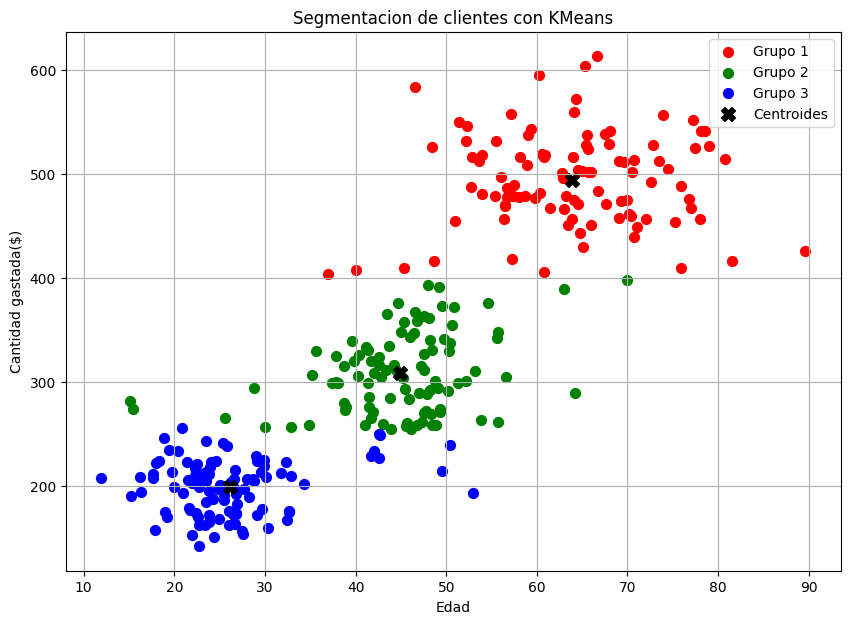

In [ ]:
plt.figure(figsize=(10, 7))
colors=['r', 'g', 'b']
for i in range (3):
  plt.scatter(X[labels==i][:, 0], X[labels==i][:, 1], c=colors[i], label=f"Grupo {i+1}", s=50)
  print("Cluster ", i+1)
  print(X[labels==i])
  print("Edad: ",X[labels==i][:, 0], "Gastos:", X[labels==i][:, 1], sep="\n")
  print("-------------------------------------------------")
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroides')
plt.title('Segmentacion de clientes con KMeans')
plt.xlabel('Edad')
plt.ylabel('Cantidad gastada($)')
plt.legend()
plt.grid(True)
plt.show()

# 12.- MODELO DE CLUSTERIZACION. DBSCAN

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Carga de datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
 #Preprocesamiento de datos
# Eliminaremos 'Region' y 'Channel' para enfocarnos en los atributos de gasto
df = df.drop(['Region', 'Channel'], axis=1)

#Normaliza los datos para que tengan media cero y desviación estándar uno. Esto
# es importante porque DBSCAN es sensible a la escala de los atributos.
scaler= StandardScaler()

#Fit: Aprende los parámetros necesarios para realizar una transformación adecuada
# de los datos. Por ejemplo, en el caso de StandardScaler, aprende la media y la
#desviación estándar de cada característica de los datos. ESTE FIT ES DIFERENTE
#AL FIT DE ENTRENAMIENTO DEL MODELO
# Transform: Aplica la transformación a los datos utilizando los parámetros aprendidos
#en el paso de "fit". Para StandardScaler, esto significa restar la media y dividir
#por la desviación estándar para cada característica, normalizando así los datos.

data_scaled = scaler.fit_transform(df)


# Aplicar DBSCAN
# Se elige un eps y min_samples que parezcan adecuados para el tamaño y la dispersión de los datos
model = DBSCAN(eps=2, min_samples=5) #eps =distancia máxima entre dos puntos para que
# se consideren en la misma "vecindad"
#min_samples: número mínimo de puntos que deben encontrarse dentro del radio
# eps de un punto para que ese punto sea considerado un punto central (core point)

clusters = model.fit_predict(data_scaled)

#Fit:este paso implica que el modelo aprenda o "ajuste" los datos que se le
#proporcionan. Para DBSCAN, esto significa identificar los puntos centrales
#(core points), establecer cuáles puntos son puntos frontera (border points), etc.

#Predict:A diferencia de otros algoritmos donde predict generalmente se refiere
# a hacer predicciones sobre nuevos datos, en el contexto de clustering este "predict"
# simplemente asigna cada punto del conjunto de datos a un cluster específico basado
# en el aprendizaje realizado en el paso de "fit". Los clusters son identificados
# durante el ajuste, y cada punto de los datos es etiquetado con el índice del
# cluster al que pertenece o marcado como ruido.

# Calcular el coeficiente de silueta

silhouette_avg = silhouette_score(data_scaled, clusters)
print(f"Coeficiente de silueta para los clusters formados: {silhouette_avg:.3f}")

Coeficiente de silueta para los clusters formados: 0.749


In [ ]:
# El coeficiente de silueta es una métrica que se utiliza para evaluar la calidad
# del clustering en un análisis de datos. Este coeficiente puede variar
# entre -1 y +1, donde:
# +1: Indica que los clusters están muy bien definidos y separados entre sí. Los
# puntos dentro de un cluster están muy cerca entre ellos, y muy lejos de los
# puntos de otros clusters.
# 0: Sugiere que los clusters se están empezando a solapar. No hay una distinción
# clara entre los clusters, y los puntos podrían pertenecer igualmente a uno u
# otro cluster.
# -1: Implica que los puntos han sido asignados a los clusters incorrectos. Los
# puntos están más cerca de los puntos de otros clusters que de los puntos de su
# propio cluster.

# Un coeficiente de 0.749 es bastante alto, lo que sugiere que los clusters que
# ha identificado DBSCAN están bastante bien definidos y separados, lo cual es un
# indicativo de un buen clustering.

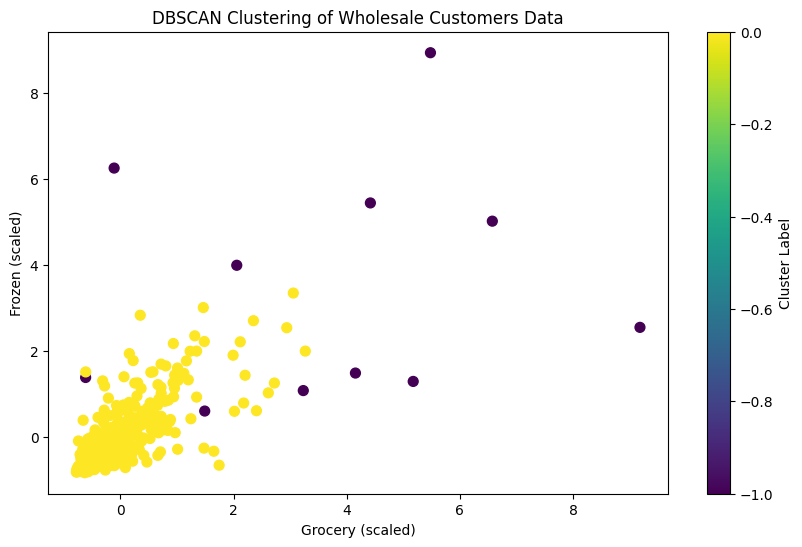

In [ ]:
# Visualización de los resultados de forma escalada

#La gráfica ayuda a visualizar cómo el algoritmo DBSCAN ha agrupado a los
#clientes en función de sus compras de "Grocery" y "Frozen". Permite identificar
#fácilmente los diferentes grupos de clientes que tienen comportamientos de compra
#similares y los clientes que no encajan en ningún grupo (ruido). Esto puede ser
#útil para tareas de segmentación de mercado, identificación de patrones de compra
#y toma de decisiones comerciales basadas en el comportamiento del cliente.

# En el contexto de la gráfica de clústeres que se describe, la acumulación de
# puntos amarillos cerca del eje (0,0) indica que existe un grupo significativo de
# clientes que se caracterizan por valores bajos tanto en sus compras de comestibles
# como de productos congelados.

# Interpretaciones posibles:

# 1.- Comportamiento de compra: Estos clientes podrían ser aquellos que realizan
# compras pequeñas de ambos tipos de productos, o que no compran con frecuencia
# ninguno de ellos.
# 2.- Segmentación de mercado: Este grupo podría representar un segmento de mercado
# distinto con necesidades y preferencias específicas. Por ejemplo, podrían ser
# estudiantes con un presupuesto limitado, personas mayores que viven solas, o
# clientes que prefieren comprar productos frescos en mercados locales.
# 3.- Estrategia de marketing: La identificación de este grupo puede ser útil para
# desarrollar estrategias de marketing específicas que se adapten a sus necesidades.
# Por ejemplo, se podrían ofrecer promociones en productos básicos o combos de
# comestibles y congelados, o se podrían crear programas de fidelización para
# incentivar la compra más frecuente.

plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 1], data_scaled[:, 2], c=clusters, cmap='viridis', s=50)  # Visualizando basándonos en dos dimensiones
plt.title('DBSCAN Clustering of Wholesale Customers Data')
plt.xlabel('Grocery (scaled)')
plt.ylabel('Frozen (scaled)')
plt.colorbar(label='Cluster Label')
plt.show()

# 12B.- RED NEURONAL

In [ ]:
# Este código es un ejemplo de cómo usar el clasificador de perceptrón multicapa
# (MLPClassifier) desde la biblioteca de aprendizaje automático scikit-learn para
# entrenar un modelo de clasificación y  hacer predicciones basadas en datos de prueba.

# La convergencia del modelo en el contexto de los algoritmos de aprendizaje
# automático, especialmente en el entrenamiento de redes neuronales como el
# MLP (Perceptrón Multicapa), se refiere a la estabilización del proceso de
# aprendizaje hacia un estado donde el modelo ya no mejora significativamente su
# rendimiento con iteraciones adicionales. En términos más técnicos, la convergencia
# ocurre cuando los cambios en los pesos y sesgos de la red neuronal entre iteraciones
# consecutivas se vuelven insignificantes, indicando que el modelo ha encontrado un
# conjunto óptimo o casi óptimo de parámetros. Aquí hay algunos puntos clave sobre
# la convergencia del modelo:

# Minimización de la función de pérdida:
# El objetivo principal en el entrenamiento de una red neuronal es minimizar una
# función de pérdida (o coste), que mide cuán bien el modelo predice el resultado
# correcto. La convergencia se alcanza cuando la función de pérdida deja de disminuir
# de manera significativa, lo que sugiere que el modelo ha aprendido lo máximo posible
# de los datos de entrenamiento dados.

# Estabilidad de los parámetros:
# Durante el entrenamiento, los pesos y sesgos de la red se ajustan mediante
# algoritmos como el descenso de gradiente. La convergencia se ha alcanzado cuando
# estos ajustes son mínimos y los parámetros del modelo se estabilizan.

# Número de iteraciones:
# Algunos modelos, como el MLPClassifier, permiten especificar un número máximo de
# iteraciones (max_iter) para el entrenamiento. Si el modelo no ha convergido después
# de estas iteraciones, el entrenamiento se detiene. Esto puede ser un signo de que
# se necesita ajustar la tasa de aprendizaje, el número de iteraciones, o revisar
# si el modelo es adecuado para los datos.

# Tasa de aprendizaje y ajustes de hiperparámetros:
# La tasa de aprendizaje es crucial para la convergencia. Una tasa demasiado alta
# puede hacer que el modelo oscile y no converja, mientras que una tasa demasiado
# baja puede hacer que el entrenamiento sea ineficientemente lento y potencialmente
# quedarse atascado en mínimos locales.

# Sobreajuste y validación:
# A veces, un modelo puede parecer que ha convergido en los datos de entrenamiento,
# pero simplemente ha memorizado los datos (sobreajuste) y no generaliza bien a nuevos
# datos. Es crucial utilizar técnicas de validación como la validación cruzada para
# asegurar que la convergencia del modelo corresponde a una verdadera generalización
# y no a un sobreajuste.

# En resumen, la convergencia indica que un modelo de aprendizaje automático ha
# encontrado una solución estable y efectiva al problema dado, pero también es
# importante verificar que esta solución sea robusta y generalizable más allá de
# los datos de entrenamiento específicos.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
!wget -O winequality-red.csv https://raw.githubusercontent.com/CharlieScot/Intelligencia-Artificial/main/MODULO_4/winequality-red.csv?token=GHSAT0AAAAAACK7WEBRZOTFEHC5YZT7G5A2ZLIQOMQ

--2024-05-04 15:05:19--  https://raw.githubusercontent.com/CharlieScot/Intelligencia-Artificial/main/MODULO_4/winequality-red.csv?token=GHSAT0AAAAAACK7WEBRZOTFEHC5YZT7G5A2ZLIQOMQ
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [text/plain]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  98.58K  --.-KB/s    in 0.02s   

2024-05-04 15:05:19 (4.75 MB/s) - ‘winequality-red.csv’ saved [100951/100951]



In [ ]:
wine=pd.read_csv('winequality-red.csv', sep=',')

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#Preprocessing Data
bins= (2, 6.5, 8)
group_names= ['bad', 'good']
wine['quality']=pd.cut(wine['quality'], bins=bins, labels=group_names)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [ ]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [ ]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [ ]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [ ]:
wine['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [ ]:
#Now separate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [ ]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#Applying Standard scaling to get optimized result
#La mayoria de los modelos necesitan scaling, los valores de nuestra base de
#datos son muy grandes comparados con otros y eso puede hacer que el modelo
#se concentre demasiado en los valores grandes

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#ahora los valores estan menos dispersos y oscilan entre -2 y 4 mas o menos
X_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

In [ ]:
# MLPClassifier es un tipo de red neuronal artificial conocido como perceptrón
# multicapa. Se utiliza comúnmente para clasificación.
# .- hidden_layer_sizes=(11, 11, 11) define la arquitectura de la red neuronal. Aquí
# se especifica que la red tiene tres capas ocultas, cada una con 11 neuronas. El
# número y tamaño de las capas ocultas son parámetros que puedes ajustar dependiendo
# de la complejidad de la tarea.
# .- max_iter=500 indica el número máximo de iteraciones o épocas que el solucionador
# utilizará para la convergencia del modelo. Si el modelo alcanza este límite sin
# converger, el entrenamiento se detiene.

mlpc=MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc=mlpc.predict(X_test)
pred_mlpc

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
X_new= [[7.3, 0.58, 0.00, 2.0, 0.065, 15.0, 21.0, 0.9946, 3.36, 0.47, 10.0]]
pred_mlpc=mlpc.predict(X_new)
pred_mlpc

array([0])

In [ ]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       273
           1       0.53      0.34      0.42        47

    accuracy                           0.86       320
   macro avg       0.71      0.64      0.67       320
weighted avg       0.84      0.86      0.85       320

[[259  14]
 [ 31  16]]
